In [1]:
# Library for Data Manipulation
import pandas as pd
import numpy as np

# Library for Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker

# Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset
pd.set_option("display.max.columns", None)

# Loading Dataset 

In [2]:
df = pd.read_csv('ibm.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## Data Wrangling 

In [4]:
print("dataset shape: ",df.shape)

dataset shape:  (1470, 35)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [7]:
cols=df.select_dtypes(exclude=['int64','float64']).columns
for col in cols:
    print(df[col].value_counts())
    print(' ')
    print(' ')

Attrition
No     1233
Yes     237
Name: count, dtype: int64
 
 
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
 
 
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
 
 
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
 
 
Gender
Male      882
Female    588
Name: count, dtype: int64
 
 
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
 
 
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
 
 
O

In [8]:
# Pourcentage des valeurs manquantes par variable 
prct_manquants= df.isna().sum()*100/df.shape[0]

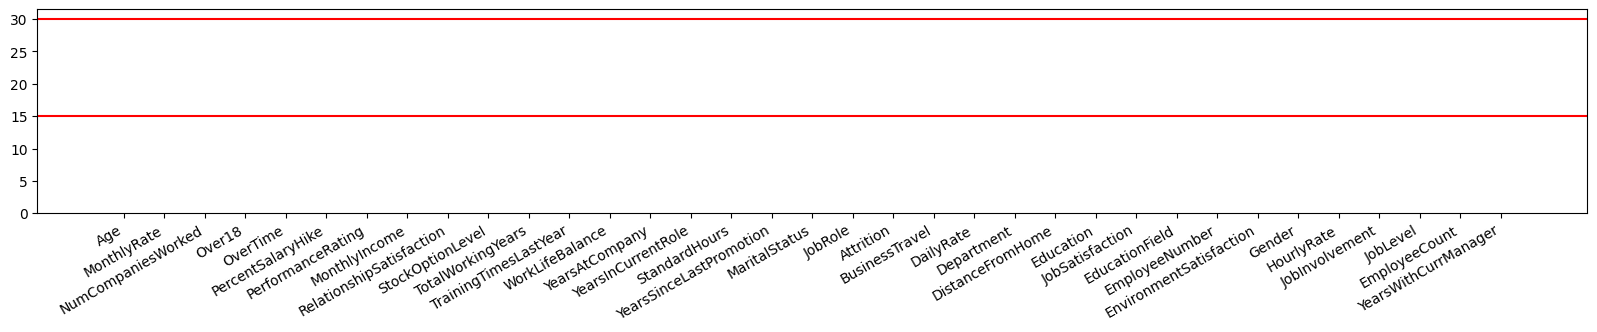

In [9]:
# Visualisation du pourcentage de manquants par variable

fig=plt.figure(figsize=(20,3))
plt.bar(x=prct_manquants.sort_values().index, height=prct_manquants.sort_values().values)
plt.axhline(y=15, color='r',linestyle='-') #Ligne à 15%
plt.axhline(y=30, color='r',linestyle='-') #Ligne à 30%
plt.xticks(rotation=90)

fig.autofmt_xdate()

In [10]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  0


### Détection des outliers 

In [11]:
cat_columns = df.select_dtypes(include=['object']).columns
df_no_cat = df.drop(columns=cat_columns)

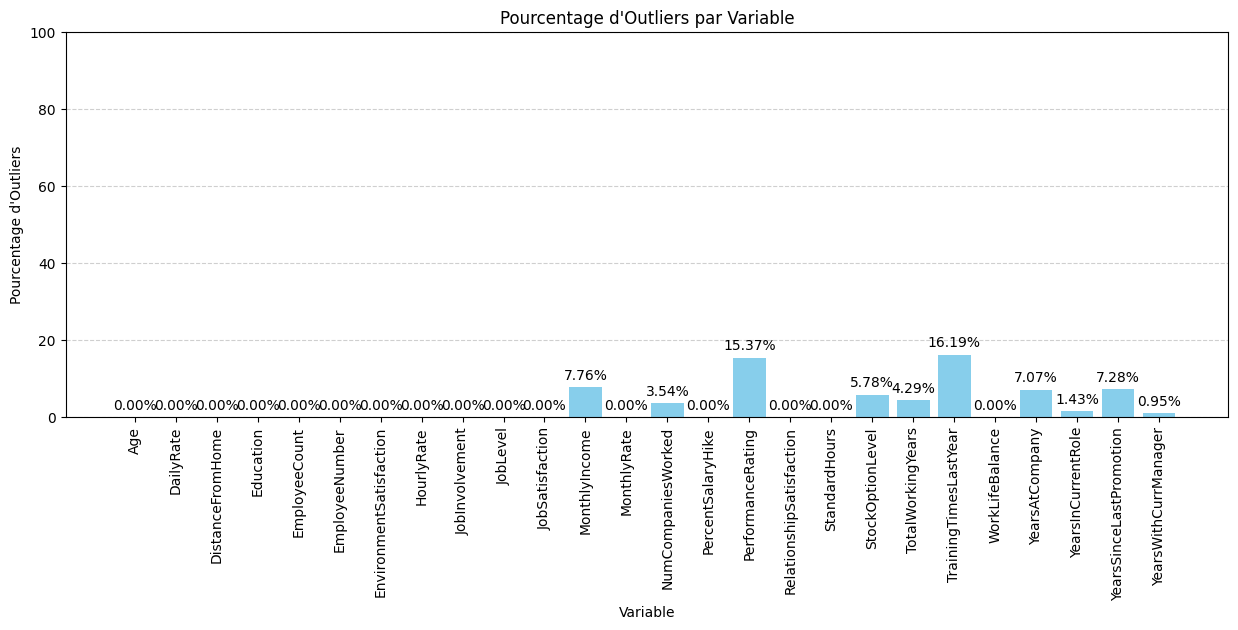

In [12]:
variables = df_no_cat.columns
percentage_outliers = []

for variable in variables:
    q1 = df_no_cat[variable].quantile(0.25)
    q3 = df_no_cat[variable].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_no_cat[(df_no_cat[variable] < lower_bound) | (df_no_cat[variable] > upper_bound)]

    percentage = (len(outliers) / len(df_no_cat)) * 100
    percentage_outliers.append(percentage)

plt.figure(figsize=(15, 5))
plt.bar(variables, percentage_outliers, color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Pourcentage d\'Outliers')
plt.title('Pourcentage d\'Outliers par Variable')
plt.ylim(0, 100)

for i, percentage in enumerate(percentage_outliers):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.show()


### DBSCAN

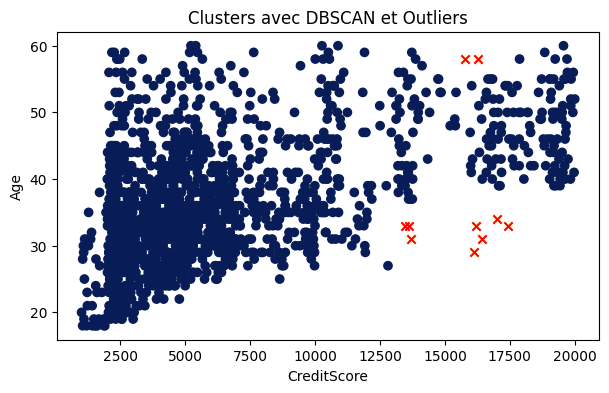

Pourcentage d'Outliers : 0.68%


In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances


X = df[['MonthlyIncome', 'Age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.3
min_samples = 5 
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)  

outliers = X[labels == -1]

percentage_outliers = len(outliers) / len(X) * 100
plt.figure(figsize=(7, 4))
plt.scatter(X['MonthlyIncome'], X['Age'], c=labels,cmap='YlGnBu',label='Clusters')
plt.scatter(outliers['MonthlyIncome'], outliers['Age'], color='red', marker='x', label='Outliers')
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.title('Clusters avec DBSCAN et Outliers')
plt.show()

print(f"Pourcentage d'Outliers : {percentage_outliers:.2f}%")

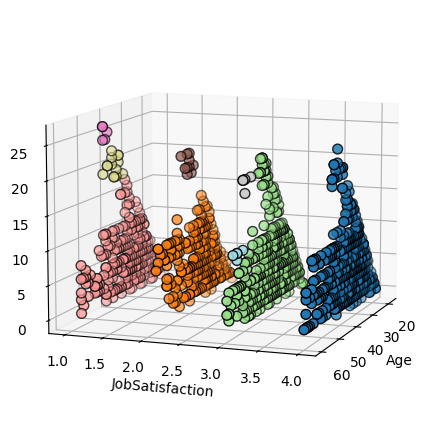

		Pourcentage d'Outliers : 5.78%


In [14]:
from mpl_toolkits.mplot3d import Axes3D

X_1= df[['Age', 'JobSatisfaction', 'YearsAtCompany']]

scaler = StandardScaler()
X_scaled_1= scaler.fit_transform(X_1)

eps = 0.34
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_1= dbscan.fit_predict(X_scaled_1)

clustered_data = X_1[labels_1!= -1]

outliers = X_1[labels_1 == -1]

percentage_outliers = (len(outliers) / len(X_1)) * 100

num_clusters = len(set(labels_1)) - (1 if -1 in labels_1 else 0)


fig = plt.figure(figsize=(9,5.5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clustered_data['Age'], clustered_data['JobSatisfaction'], clustered_data['YearsAtCompany'], 
           c=labels_1[labels_1!= -1], s=50, label='Clusters',edgecolors='black',cmap='tab20')

#ax.scatter(outliers['Age'], outliers['CreditScore'], outliers['Tenure'], color='red', marker='x', s=100, label='Outliers')

ax.set_xlabel('Age')
ax.set_ylabel('JobSatisfaction')
ax.set_zlabel('YearsAtCompany')
#ax.set_title('Clusters avec DBSCAN en 3D')

ax.view_init(elev=10, azim=20)

plt.show()
print(f"\t\tPourcentage d'Outliers : {percentage_outliers:.2f}%")


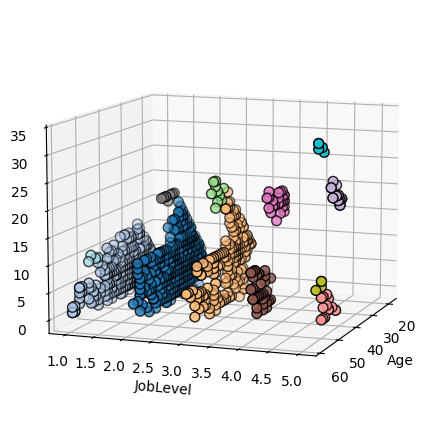

		Pourcentage d'Outliers : 7.48%


In [15]:
from mpl_toolkits.mplot3d import Axes3D

X_1= df[['Age', 'JobLevel', 'YearsAtCompany']]

scaler = StandardScaler()
X_scaled_1= scaler.fit_transform(X_1)

eps = 0.34
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_1= dbscan.fit_predict(X_scaled_1)

clustered_data = X_1[labels_1!= -1]

outliers = X_1[labels_1 == -1]

percentage_outliers = (len(outliers) / len(X_1)) * 100

num_clusters = len(set(labels_1)) - (1 if -1 in labels_1 else 0)


fig = plt.figure(figsize=(9,5.5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clustered_data['Age'], clustered_data['JobLevel'], clustered_data['YearsAtCompany'], 
           c=labels_1[labels_1!= -1], s=50, label='Clusters',edgecolors='black',cmap='tab20')

#ax.scatter(outliers['Age'], outliers['CreditScore'], outliers['Tenure'], color='red', marker='x', s=100, label='Outliers')

ax.set_xlabel('Age')
ax.set_ylabel('JobLevel')
ax.set_zlabel('YearsAtCompany')
#ax.set_title('Clusters avec DBSCAN en 3D')

ax.view_init(elev=10, azim=20)

plt.show()
print(f"\t\tPourcentage d'Outliers : {percentage_outliers:.2f}%")


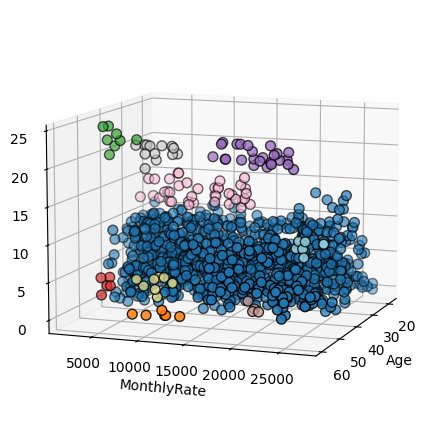

		Pourcentage d'Outliers : 12.31%


In [16]:
from mpl_toolkits.mplot3d import Axes3D

X_1= df[['Age', 'MonthlyRate', 'YearsAtCompany']]

scaler = StandardScaler()
X_scaled_1= scaler.fit_transform(X_1)

eps = 0.34
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_1= dbscan.fit_predict(X_scaled_1)

clustered_data = X_1[labels_1!= -1]

outliers = X_1[labels_1 == -1]

percentage_outliers = (len(outliers) / len(X_1)) * 100

num_clusters = len(set(labels_1)) - (1 if -1 in labels_1 else 0)


fig = plt.figure(figsize=(9,5.5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clustered_data['Age'], clustered_data['MonthlyRate'], clustered_data['YearsAtCompany'], 
           c=labels_1[labels_1!= -1], s=50, label='Clusters',edgecolors='black',cmap='tab20')

#ax.scatter(outliers['Age'], outliers['CreditScore'], outliers['Tenure'], color='red', marker='x', s=100, label='Outliers')

ax.set_xlabel('Age')
ax.set_ylabel('MonthlyRate')
ax.set_zlabel('YearsAtCompany')
#ax.set_title('Clusters avec DBSCAN en 3D')

ax.view_init(elev=10, azim=20)

plt.show()
print(f"\t\tPourcentage d'Outliers : {percentage_outliers:.2f}%")


### KMeans

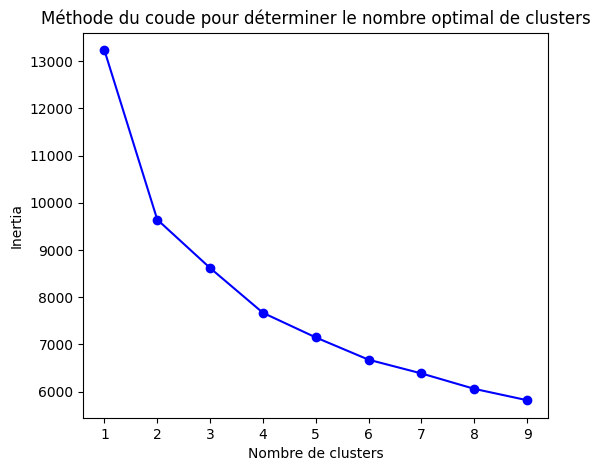

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes pertinentes pour la segmentation
columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
employee_data = df[columns]

# Normaliser les données
scaler = StandardScaler()
employee_data_scaled = scaler.fit_transform(employee_data)

# Déterminer le nombre optimal de clusters en utilisant la méthode du coude
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(employee_data_scaled)
    inertia.append(kmeans.inertia_)



# Visualiser la méthode du coude
plt.figure(figsize=(6, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()


In [18]:
# Choisir le nombre de clusters (par exemple, 3)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
employee_data['Cluster'] = kmeans.fit_predict(employee_data_scaled)

# Obtenir les caractéristiques de chaque cluster
cluster_characteristics = employee_data.groupby('Cluster').mean()

In [19]:
round(cluster_characteristics)

Age  DailyRate  DistanceFromHome  Education  TotalWorkingYears  \
Cluster                                                                    
0        35.0      807.0               9.0        3.0                8.0   
1        41.0      793.0               9.0        3.0               17.0   

         YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
Cluster                                                                
0                   4.0                 2.0                      1.0   
1                  13.0                 8.0                      5.0   

         YearsWithCurrManager  
Cluster                        
0                         2.0  
1                         8.0

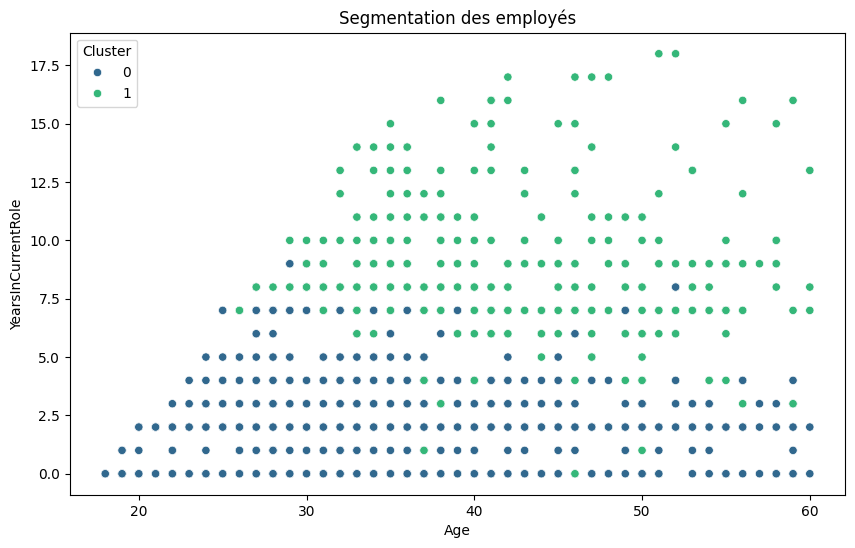

In [20]:
# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=employee_data, x='Age', y='YearsInCurrentRole', hue='Cluster', palette='viridis')
plt.title('Segmentation des employés')
plt.show()

### KModes

In [21]:
from kmodes.kmodes import KModes
X=np.array(df)


In [22]:
kmodes_test=KModes(n_clusters=2,verbose=1,n_init=2)
Clusters=kmodes_test.fit_predict(X)
print(kmodes_test)
print(Clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 247, cost: 29393.0
Run 1, iteration: 2/100, moves: 3, cost: 29393.0
KModes(n_clusters=2, n_init=1, verbose=1)
[0 1 0 ... 0 1 1]


In [23]:
print(kmodes_test.cluster_centroids_)

[['34' 'No' 'Travel_Rarely' '329' 'Research & Development' '1' '3'
  'Life Sciences' '1' '1' '4' 'Male' '79' '3' '1' 'Research Scientist'
  '3' 'Single' '2342' '4223' '1' 'Y' 'No' '13' '3' '4' '80' '0' '10' '2'
  '3' '1' '2' '0' '0']
 ['31' 'No' 'Travel_Rarely' '691' 'Sales' '2' '3' 'Medical' '1' '23' '3'
  'Female' '48' '3' '2' 'Sales Executive' '4' 'Married' '4639' '4658' '1'
  'Y' 'No' '11' '3' '3' '80' '1' '10' '3' '3' '5' '2' '1' '2']]


### Observation 
  

In [24]:
#Descriptive analysis
round(df.describe().T,2)

count      mean      std     min      25%      50%  \
Age                       1470.0     36.92     9.14    18.0    30.00     36.0   
DailyRate                 1470.0    802.49   403.51   102.0   465.00    802.0   
DistanceFromHome          1470.0      9.19     8.11     1.0     2.00      7.0   
Education                 1470.0      2.91     1.02     1.0     2.00      3.0   
EmployeeCount             1470.0      1.00     0.00     1.0     1.00      1.0   
EmployeeNumber            1470.0   1024.87   602.02     1.0   491.25   1020.5   
EnvironmentSatisfaction   1470.0      2.72     1.09     1.0     2.00      3.0   
HourlyRate                1470.0     65.89    20.33    30.0    48.00     66.0   
JobInvolvement            1470.0      2.73     0.71     1.0     2.00      3.0   
JobLevel                  1470.0      2.06     1.11     1.0     1.00      2.0   
JobSatisfaction           1470.0      2.73     1.10     1.0     2.00      3.0   
MonthlyIncome             1470.0   6502.93  4707.96  1009.0  2911.00   4919.0   
MonthlyRate               1470.0  14313.10  7117.79  2094.0  8047.00  14235.5   
NumCompaniesWorked        1470.0      2.69     2.50     0.0     1.00      2.0   
PercentSalaryHike         1470.0     15.21     3.66    11.0    12.00     14.0   
PerformanceRating         1470.0      3.15     0.36     3.0     3.00      3.0   
RelationshipSatisfaction  1470.0      2.71     1.08     1.0     2.00      3.0   
StandardHours             1470.0     80.00     0.00    80.0    80.00     80.0   
StockOptionLevel          1470.0      0.79     0.85     0.0     0.00      1.0   
TotalWorkingYears         1470.0     11.28     7.78     0.0     6.00     10.0   
TrainingTimesLastYear     1470.0      2.80     1.29     0.0     2.00      3.0   
WorkLifeBalance           1470.0      2.76     0.71     1.0     2.00      3.0   
YearsAtCompany            1470.0      7.01     6.13     0.0     3.00      5.0   
YearsInCurrentRole        1470.0      4.23     3.62     0.0     2.00      3.0   
YearsSinceLastPromotion   1470.0      2.19     3.22     0.0     0.00      1.0   
YearsWithCurrManager      1470.0      4.12     3.57     0.0     2.00      3.0   

                               75%      max  
Age                          43.00     60.0  
DailyRate                  1157.00   1499.0  
DistanceFromHome             14.00     29.0  
Education                     4.00      5.0  
EmployeeCount                 1.00      1.0  
EmployeeNumber             1555.75   2068.0  
EnvironmentSatisfaction       4.00      4.0  
HourlyRate                   83.75    100.0  
JobInvolvement                3.00      4.0  
JobLevel                      3.00      5.0  
JobSatisfaction               4.00      4.0  
MonthlyIncome              8379.00  19999.0  
MonthlyRate               20461.50  26999.0  
NumCompaniesWorked            4.00      9.0  
PercentSalaryHike            18.00     25.0  
PerformanceRating             3.00      4.0  
RelationshipSatisfaction      4.00      4.0  
StandardHours                80.00     80.0  
StockOptionLevel              1.00      3.0  
TotalWorkingYears            15.00     40.0  
TrainingTimesLastYear         3.00      6.0  
WorkLifeBalance               3.00      4.0  
YearsAtCompany                9.00     40.0  
YearsInCurrentRole            7.00     18.0  
YearsSinceLastPromotion       3.00     15.0  
YearsWithCurrManager          7.00     17.0

In [25]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df.drop(columns=cols, inplace=True)

In [26]:
#Descriptive analysis for categorical columns
df.describe(include="O").T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

In [27]:
#Unique values
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("-"*140)

Unique values of  Attrition {'No', 'Yes'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Sales', 'Human Resources', 'Research & Development'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Marketing', 'Technical Degree', 'Life Sciences', 'Other', 'Human Resources', 'Medical'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Gender {'Male', 'Female'}
---------------------------------------------------------

## Exploratory Data Analysis (EDA) 

#### 1. Visualizing the Employee Attrition Rate

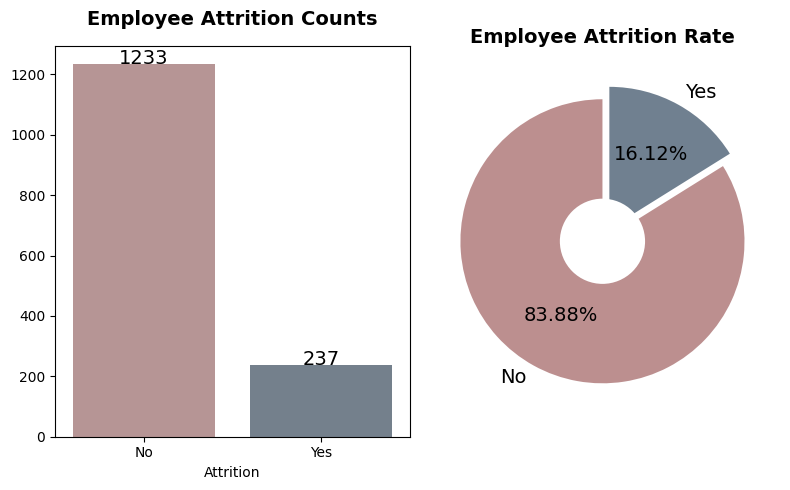

In [28]:
plt.figure(figsize=(8,5))


# Barplot
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
custom_colors_barplot = ['rosybrown','slategrey']  # Custom colors for the barplot
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=custom_colors_barplot)
plt.title("Employee Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha="center", fontsize=14)

# Pie chart
plt.subplot(1,2,2)
custom_colors_piechart = sns.color_palette('muted', len(attrition_rate))  # Custom colors for the pie chart
plt.pie(attrition_rate, labels=["No", "Yes"], autopct="%.2f%%", textprops={"size":14},
        colors=['rosybrown','slategrey'], explode=[0,0.1], startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate", fontweight="black", size=14, pad=15)

plt.tight_layout()
plt.show()

In [29]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(12, 8))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors =  ['rosybrown','slategrey','lightblue','lightgrey','firebrick']
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette= ['rosybrown','slategrey','lightblue','lightgrey','firebrick'])
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()


#### 2. Analyzing Employee Attrition by Gender.

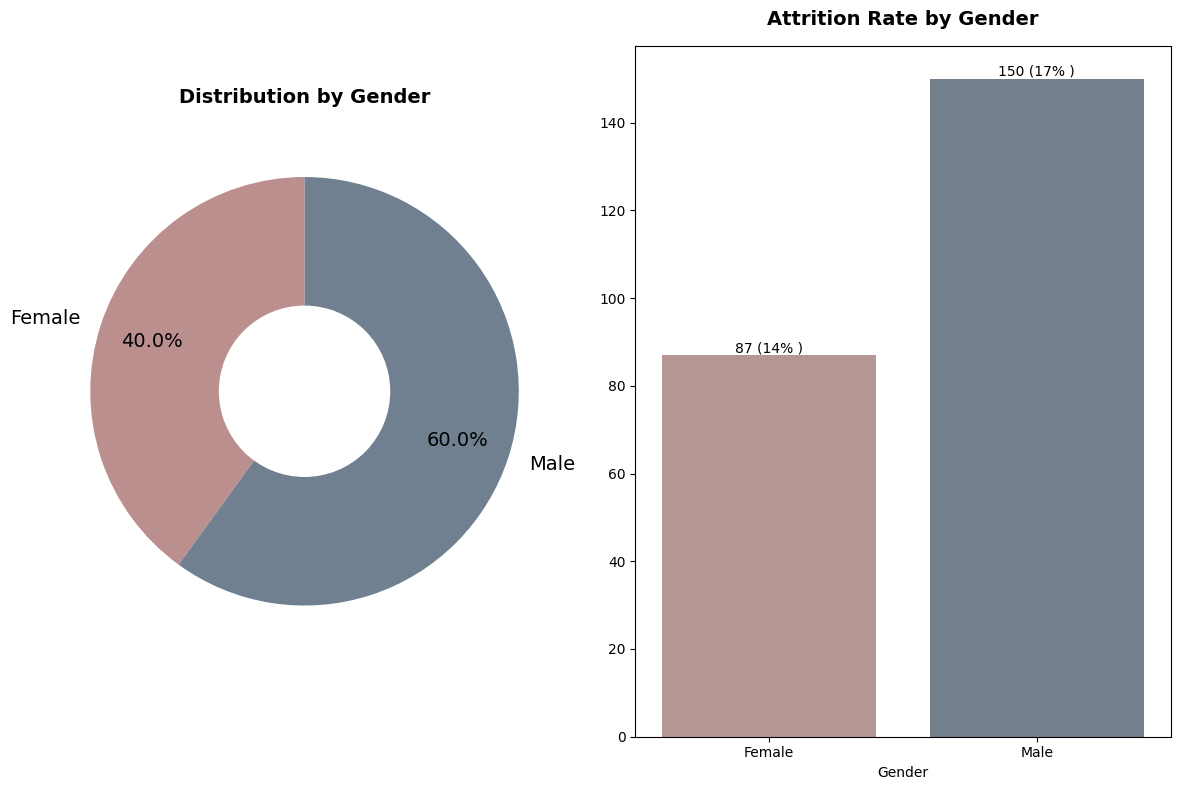

In [30]:
pie_bar_plot(df, 'Gender', 'Attrition')

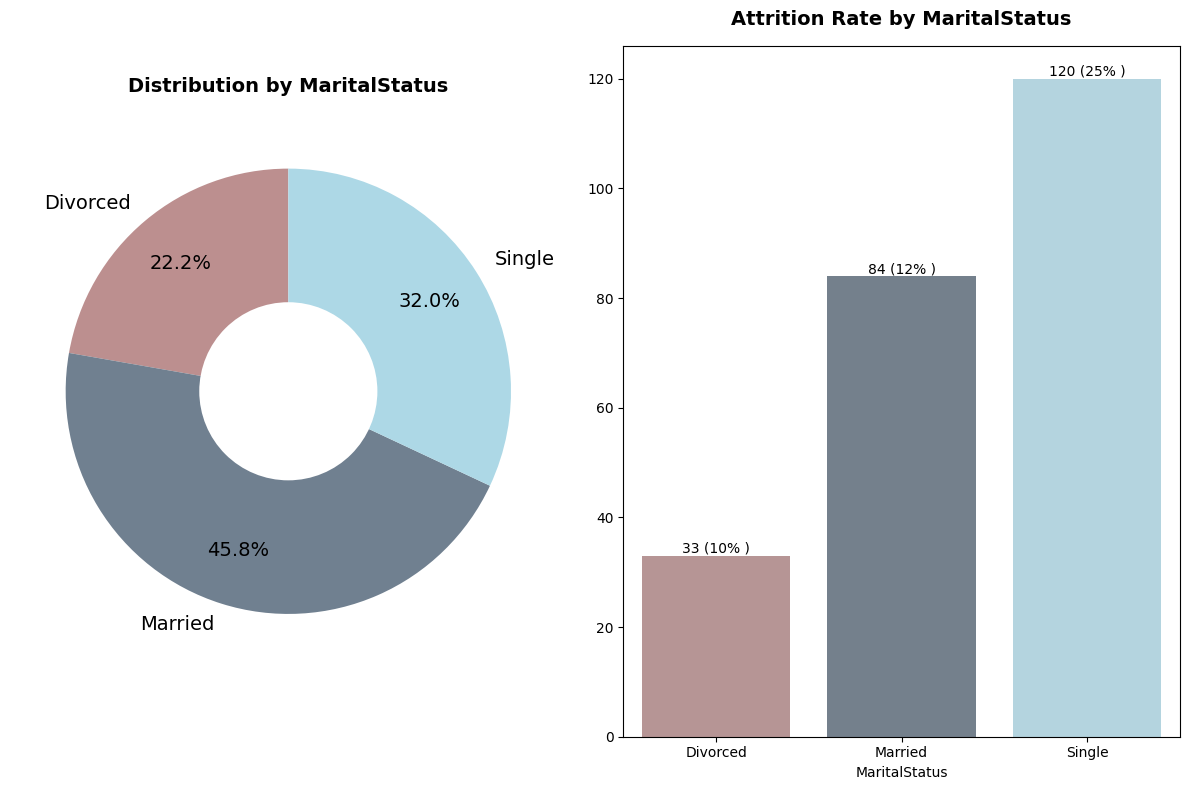

In [31]:
pie_bar_plot(df, 'MaritalStatus', 'Attrition')

#### 4. Analyzing Employee Attrition by Business Travel.

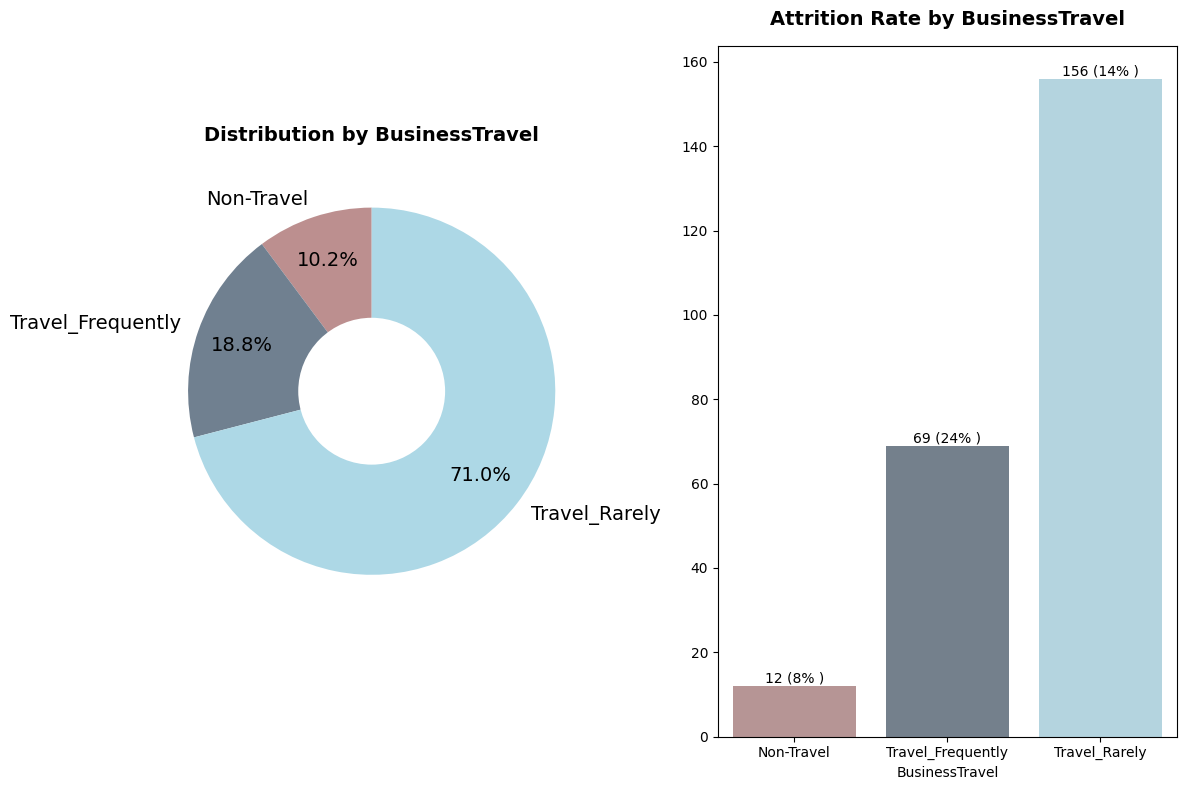

In [32]:
pie_bar_plot(df, 'BusinessTravel', 'Attrition')

#### 5. Analyzing Employee Attrition by Department.

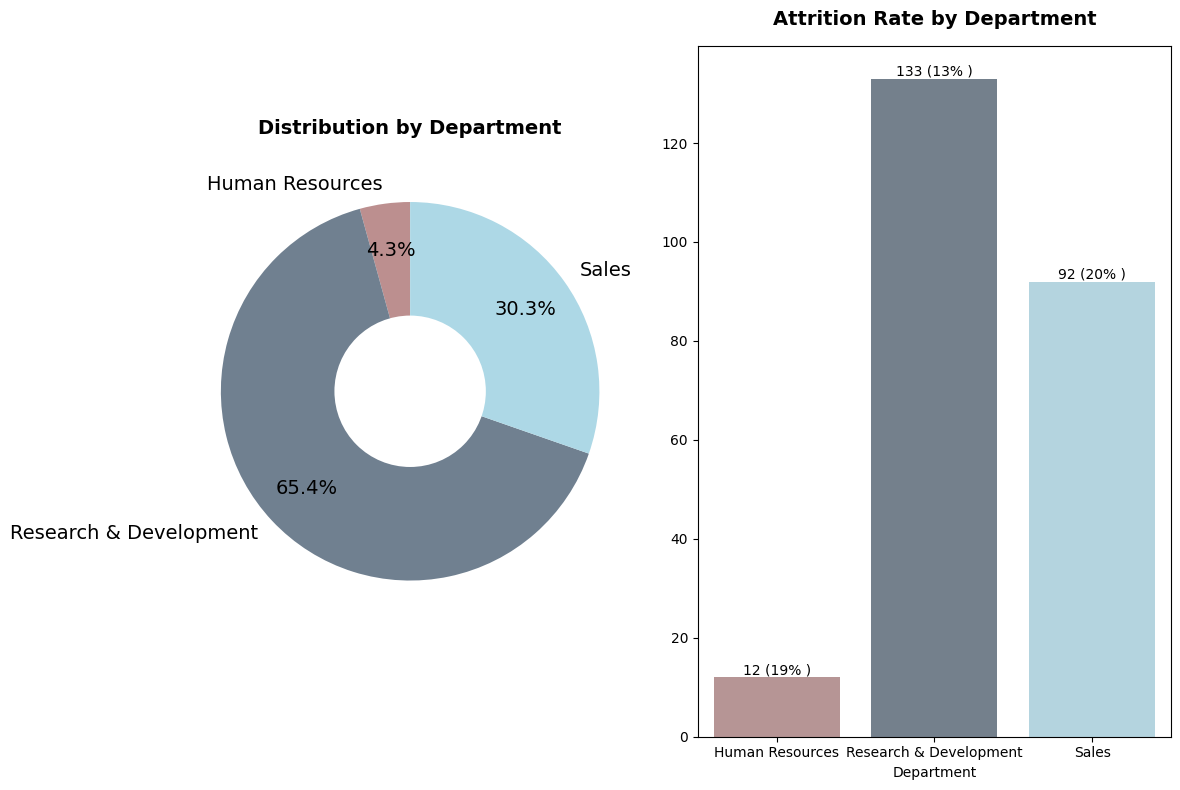

In [33]:
pie_bar_plot(df, 'Department', 'Attrition')

#### 6. Analyzing Employee Attrition by Education.

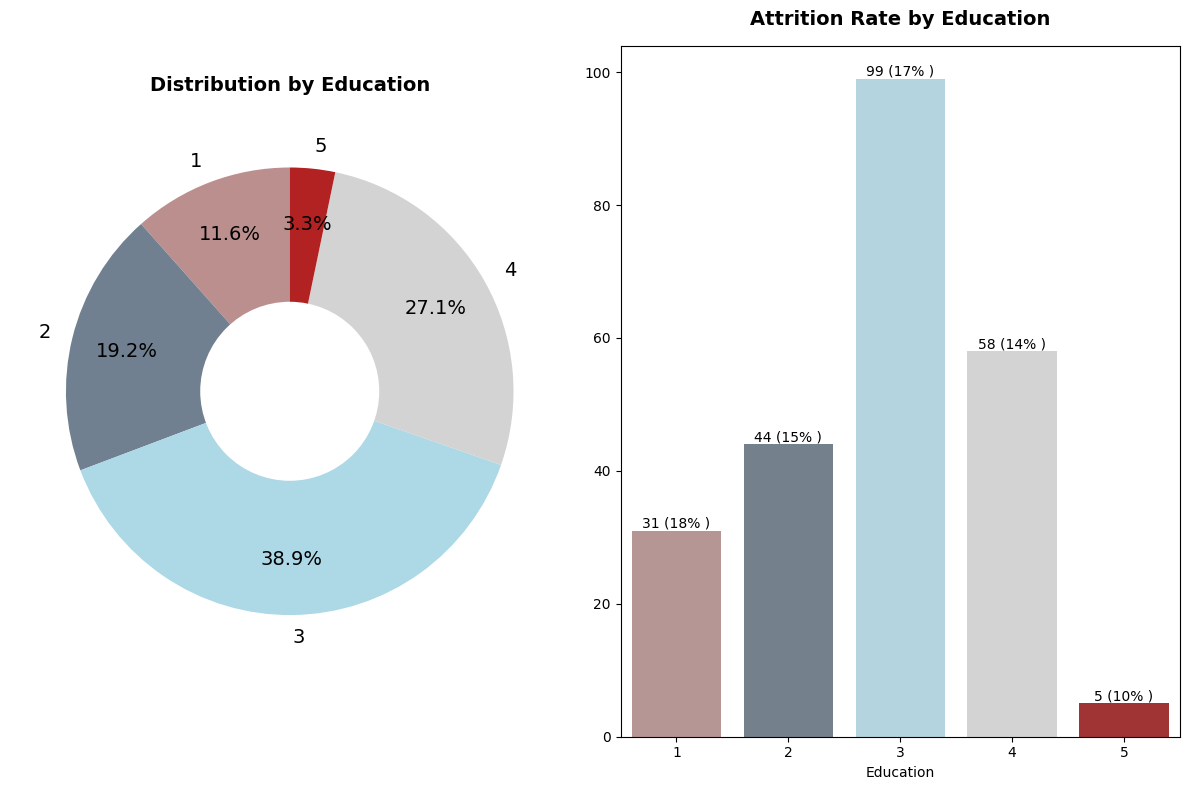

In [34]:
pie_bar_plot(df, 'Education', 'Attrition')

In [35]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette=['rosybrown','slategrey'])
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette=['rosybrown','slategrey'])
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

#### 7. Employee Distribution by Age

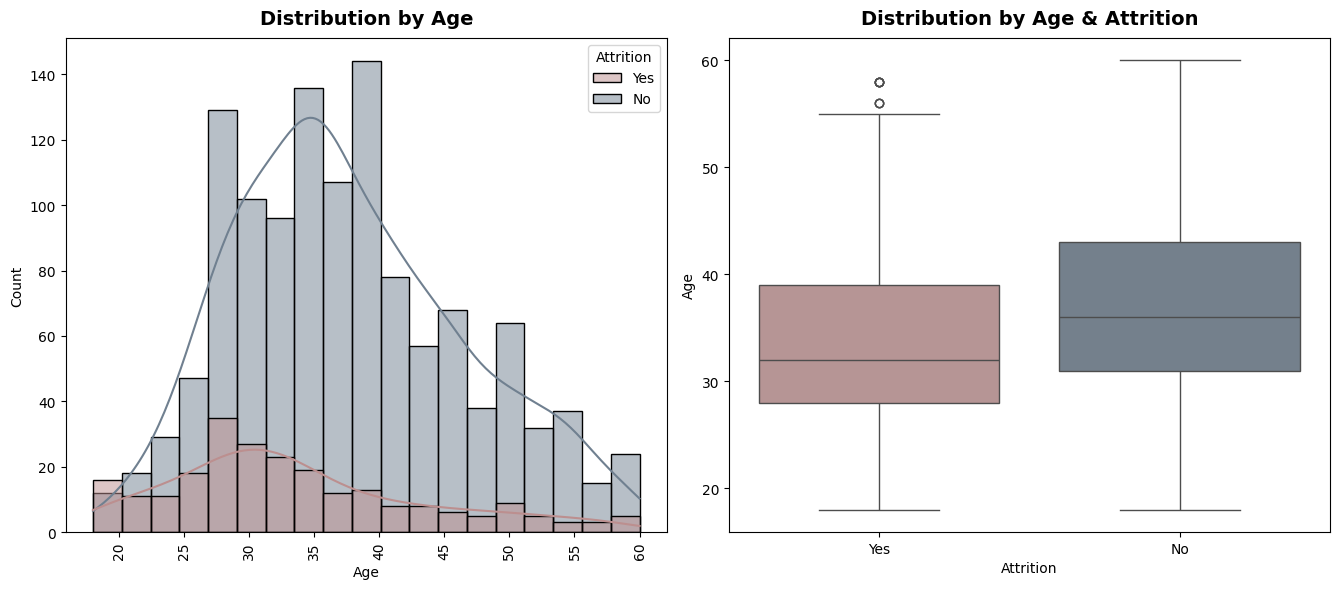

In [36]:
hist_with_hue(df, 'Age', 'Attrition')

In [37]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=['rosybrown','slategrey','lightblue','lightgrey','firebrick','lightsteelblue','thistle','indianred','aliceblue'])
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette=['rosybrown','slategrey','lightblue','lightgrey','firebrick','lightsteelblue','thistle','indianred','aliceblue'])
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

#### 8. Analyzing Employee Attrition by Education Field

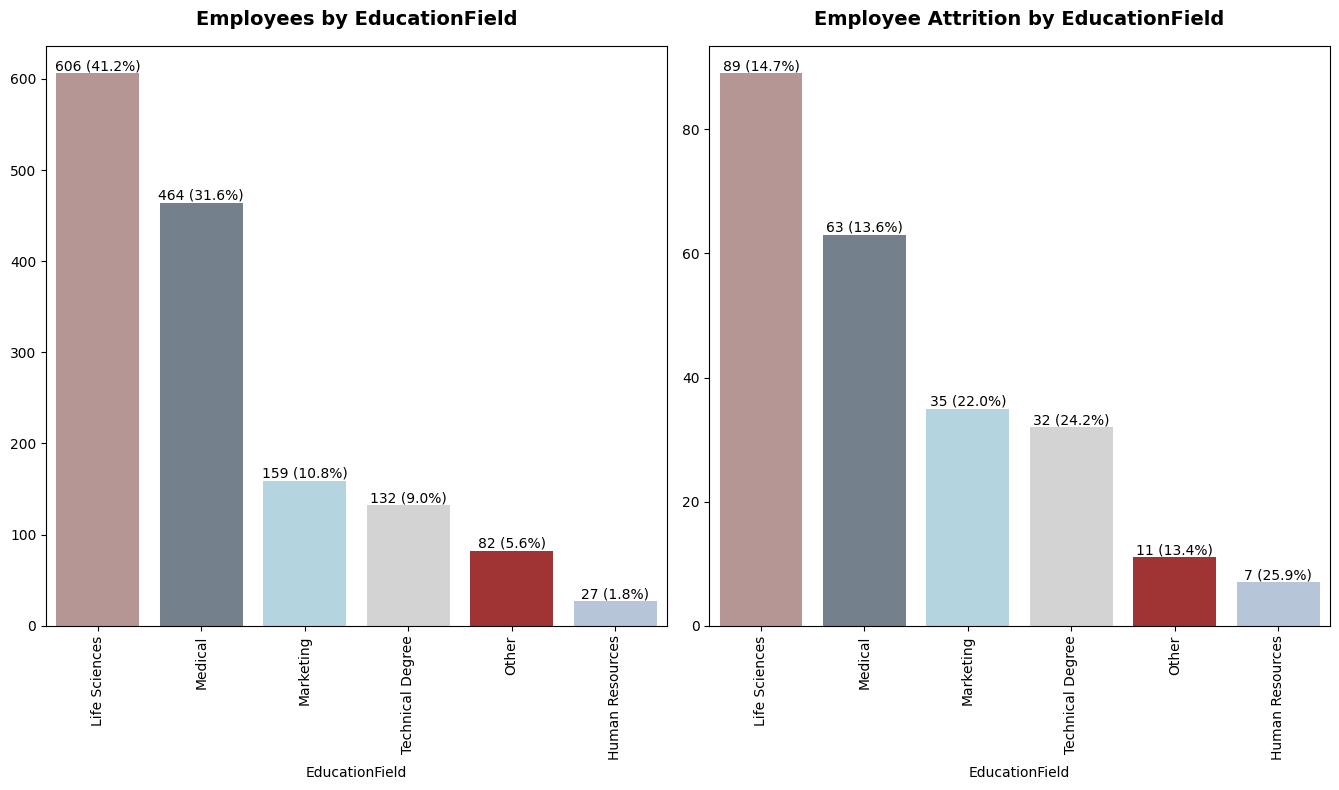

In [38]:
count_percent_plot(df, 'EducationField', 'Attrition')

#### 9. Analyzing Employee Attrition by Environment Satisfaction.

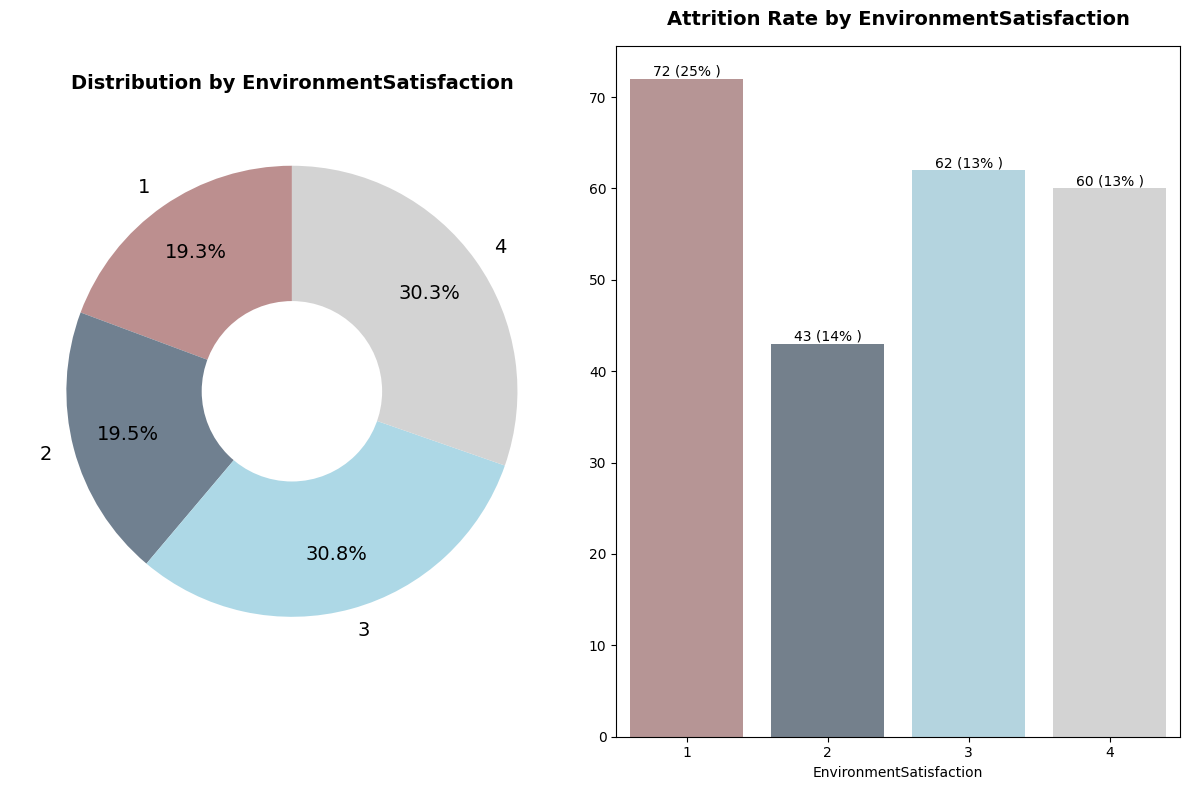

In [39]:
pie_bar_plot(df, 'EnvironmentSatisfaction', 'Attrition')

#### 10. Analyzing Employee Attrition by Job Satisfaction.

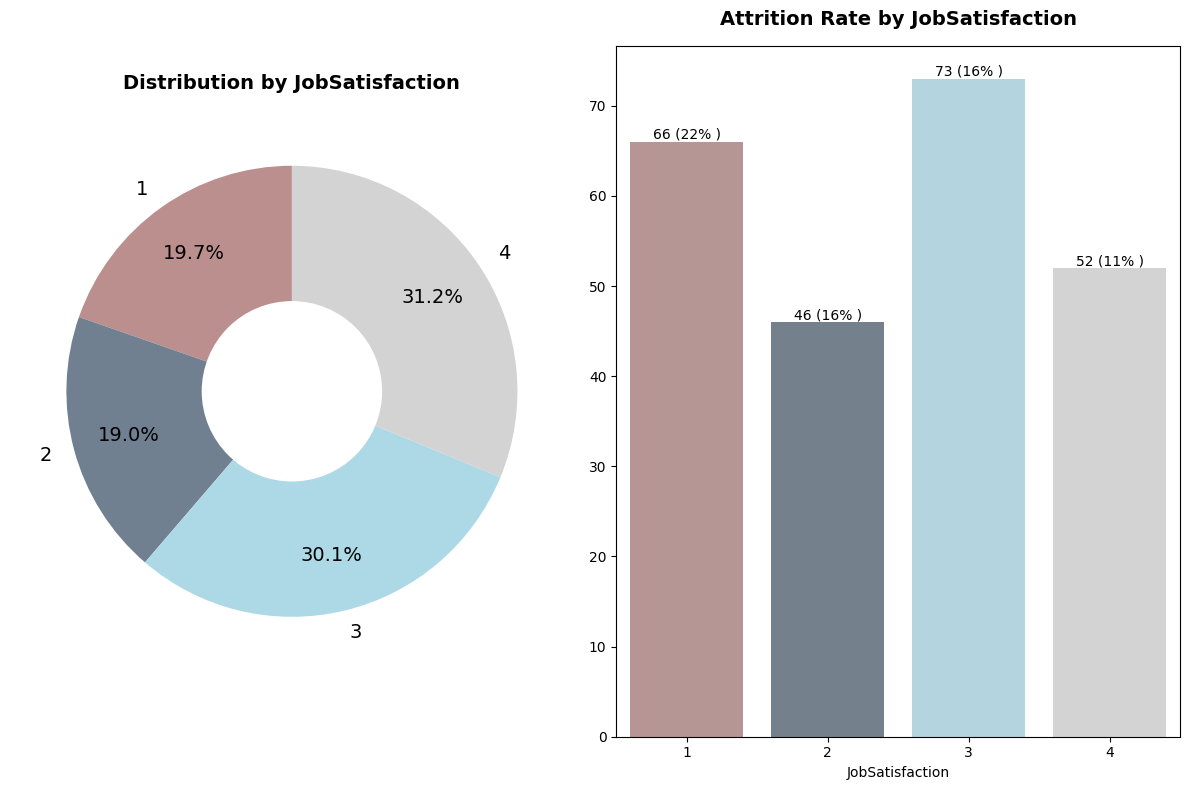

In [40]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

#### 11. Analyzing Employee Attrition by Relationship Satisfaction.

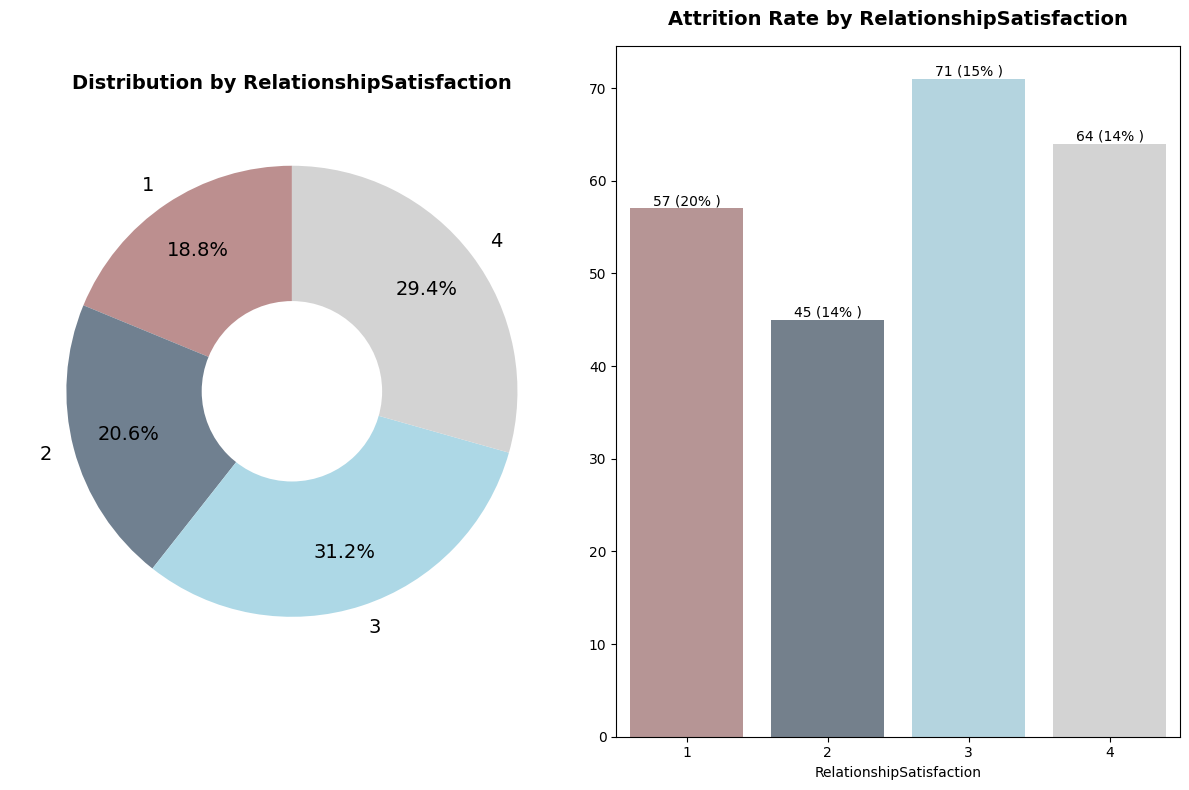

In [41]:
pie_bar_plot(df, 'RelationshipSatisfaction', 'Attrition')

#### 12. Analyzing Employee Attrition by Work Life Balance.

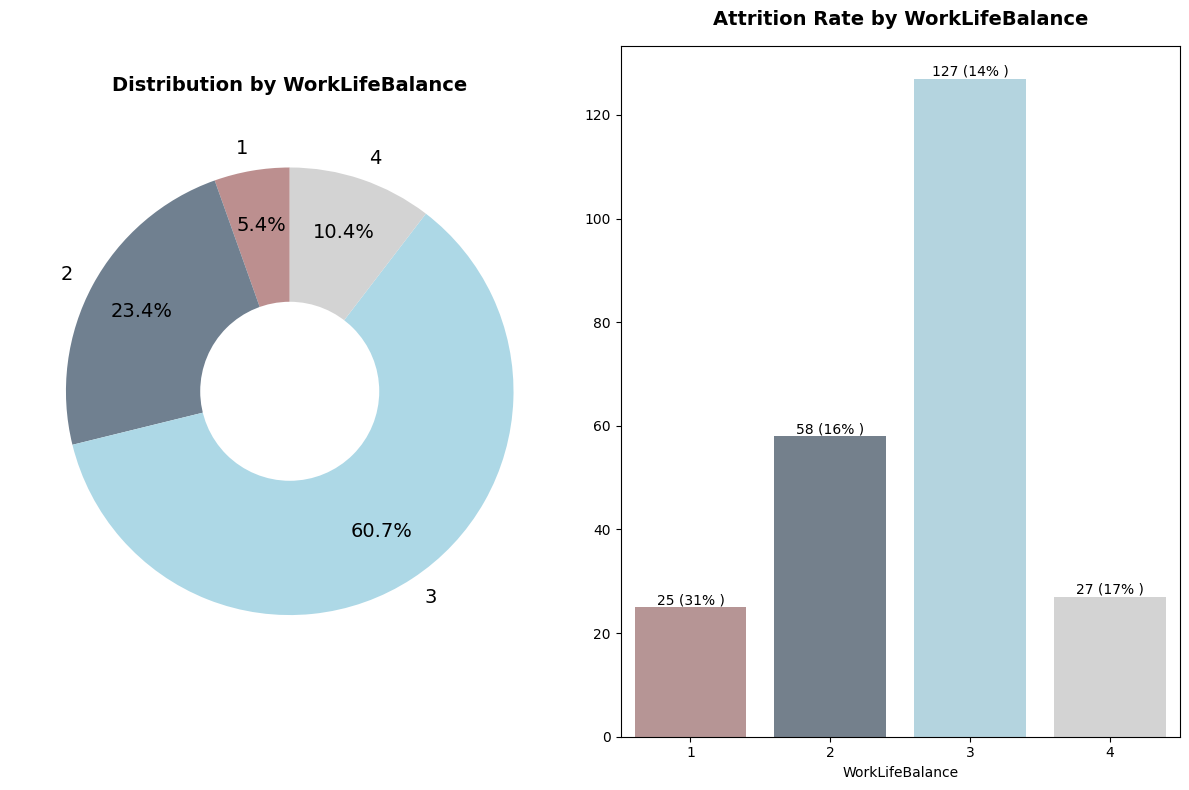

In [42]:
pie_bar_plot(df, 'WorkLifeBalance', 'Attrition')

#### 13. Analyzing Employee Attrition by Performance Rating.

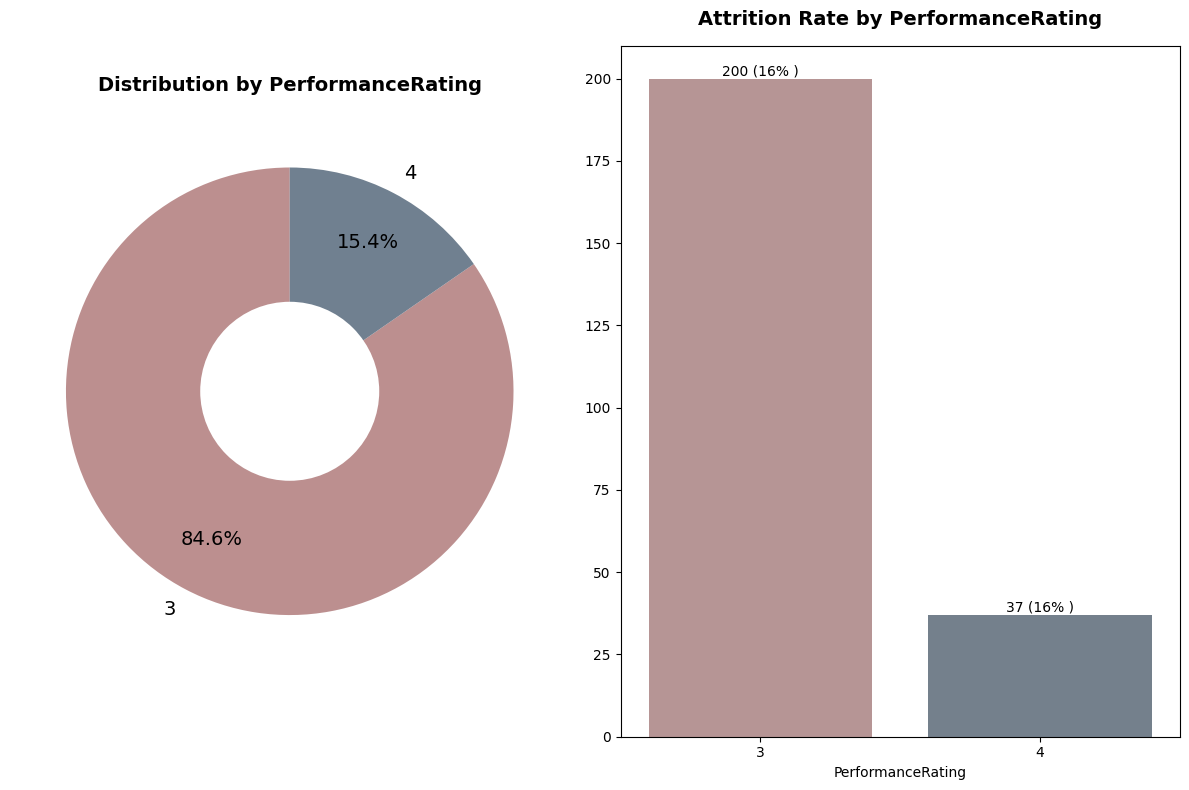

In [43]:
pie_bar_plot(df, 'PerformanceRating', 'Attrition')

#### 14. Analyzing Employee Attrition by Over Time.

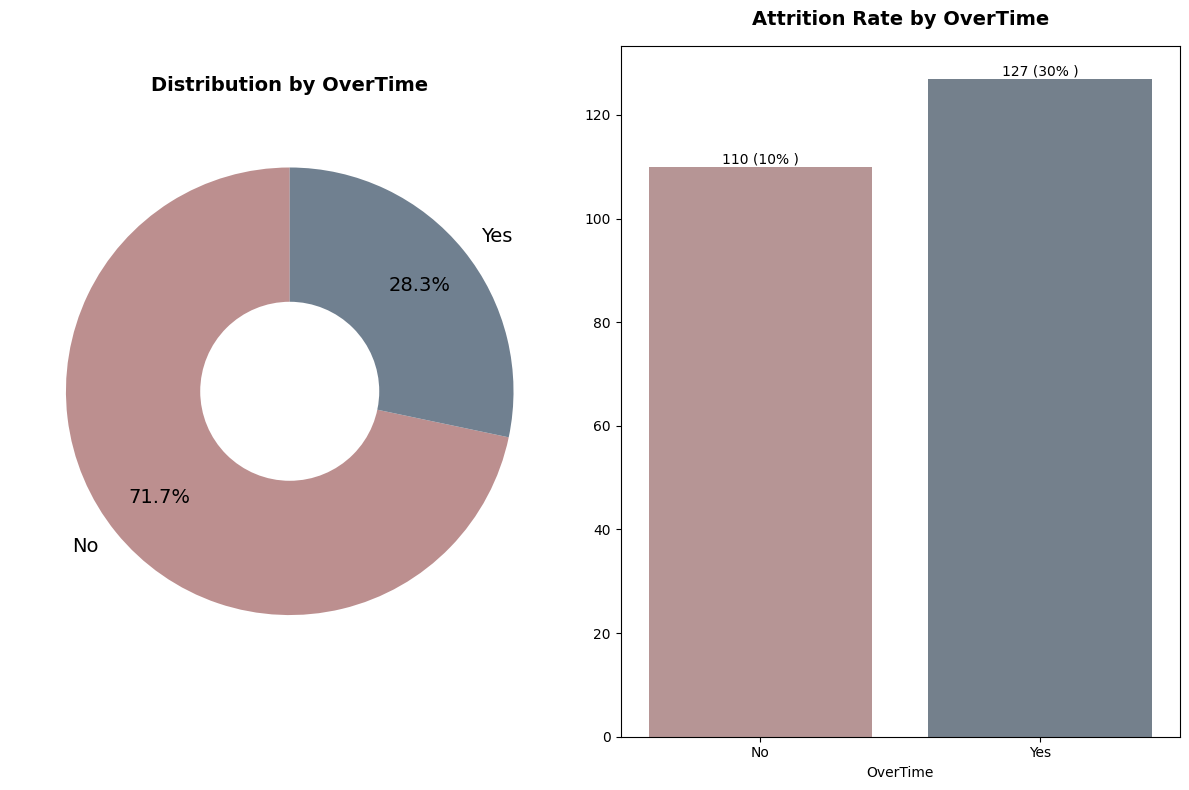

In [44]:
pie_bar_plot(df, 'OverTime', 'Attrition')

#### 15. Analyzing Employee Attrition by Daily Rate.

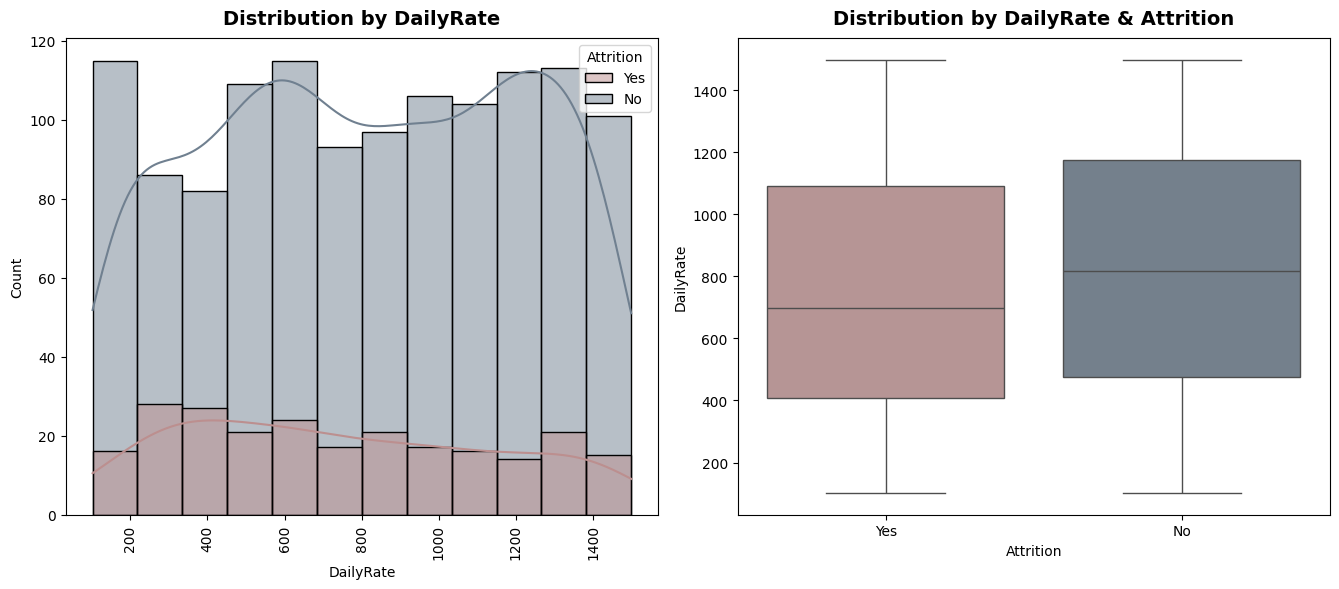

In [45]:
hist_with_hue(df, 'DailyRate', 'Attrition')

#### 16. Analyzing Employee Attrition by Job Roles 

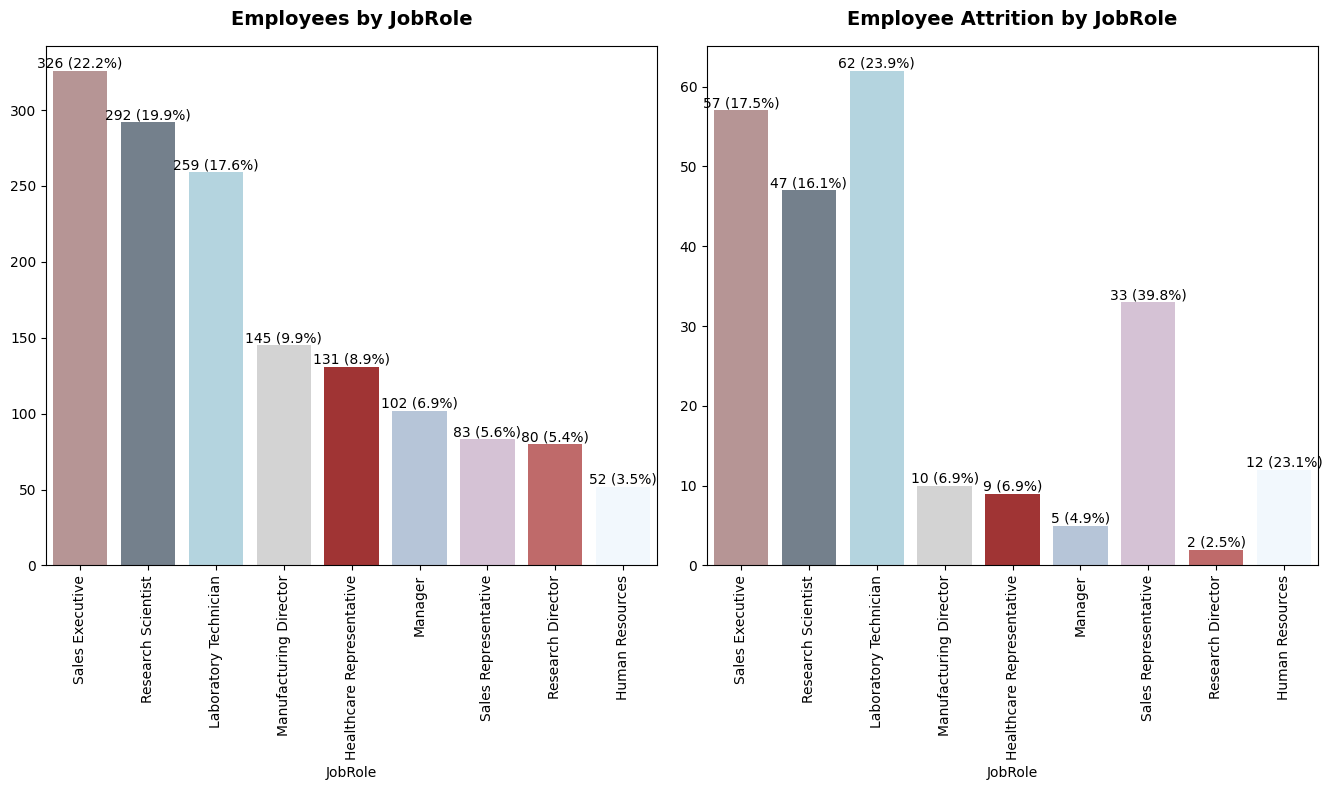

In [46]:
count_percent_plot(df, 'JobRole', 'Attrition')

#### 17. Analyzing Employee Attrition by Job Level.

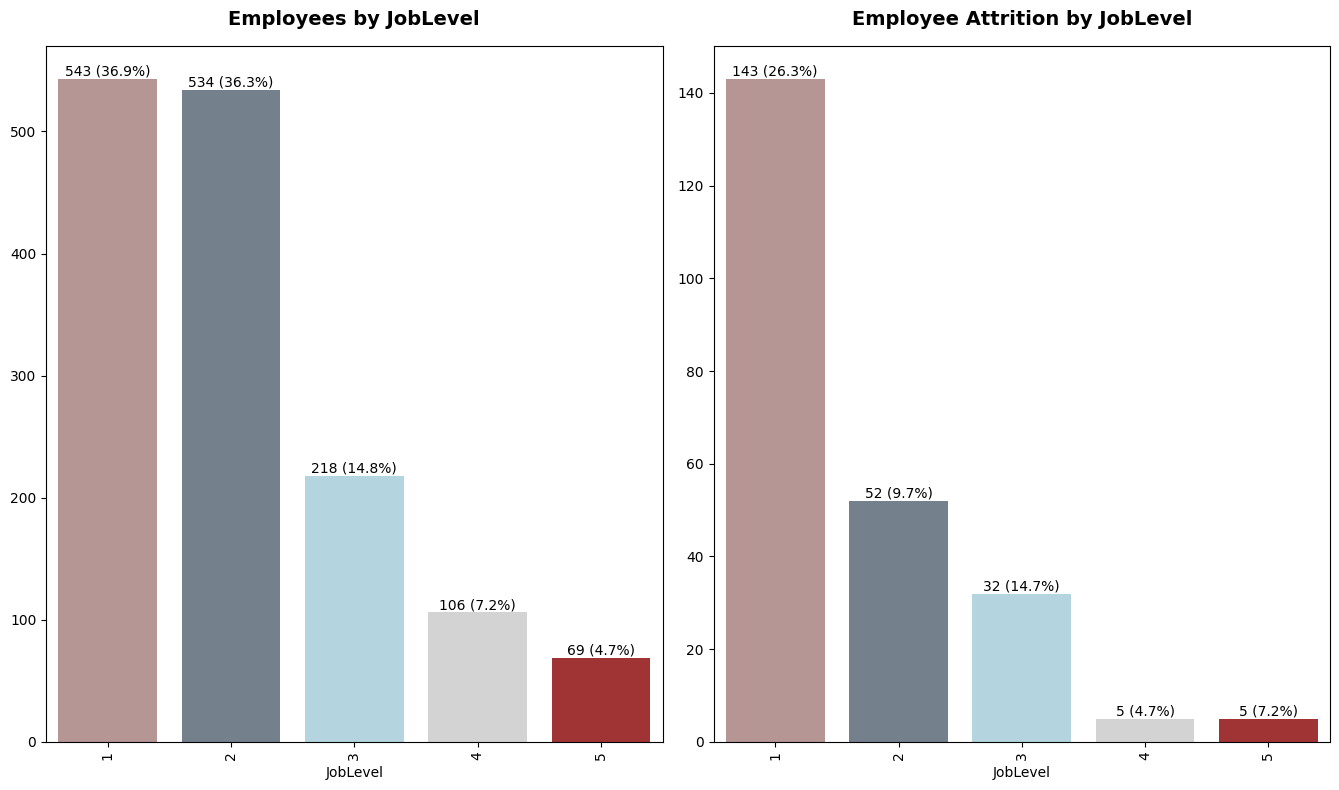

In [47]:
count_percent_plot(df, 'JobLevel', 'Attrition')

#### 18. Analyzing Employee Attrition by Monthly Income.

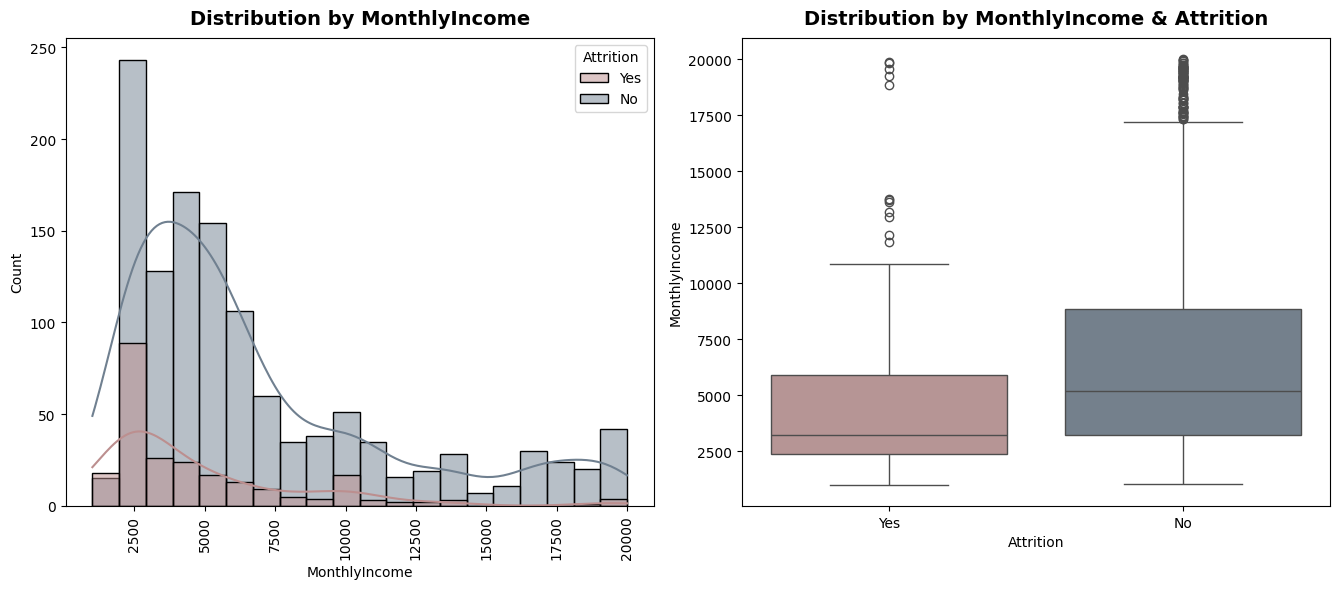

In [48]:
hist_with_hue(df, 'MonthlyIncome', 'Attrition')

#### 19. Analyzing Employee Attrition by Monthly Rate.

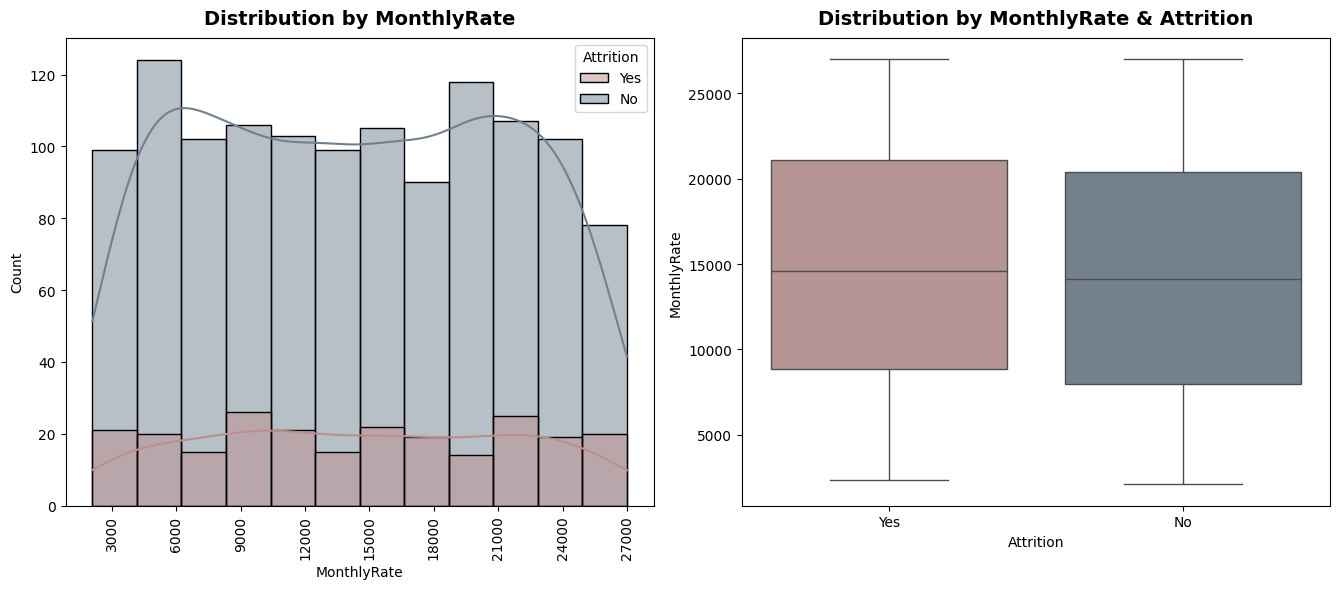

In [49]:
hist_with_hue(df, 'MonthlyRate', 'Attrition')

#### 20. Analyzing Employee Attrition by Distance From Home

In [50]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",df["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 29


In [51]:
df["DistanceFromHome"].describe().to_frame().T

count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1470.0  9.192517  8.106864  1.0  2.0  7.0  14.0  29.0

In [52]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

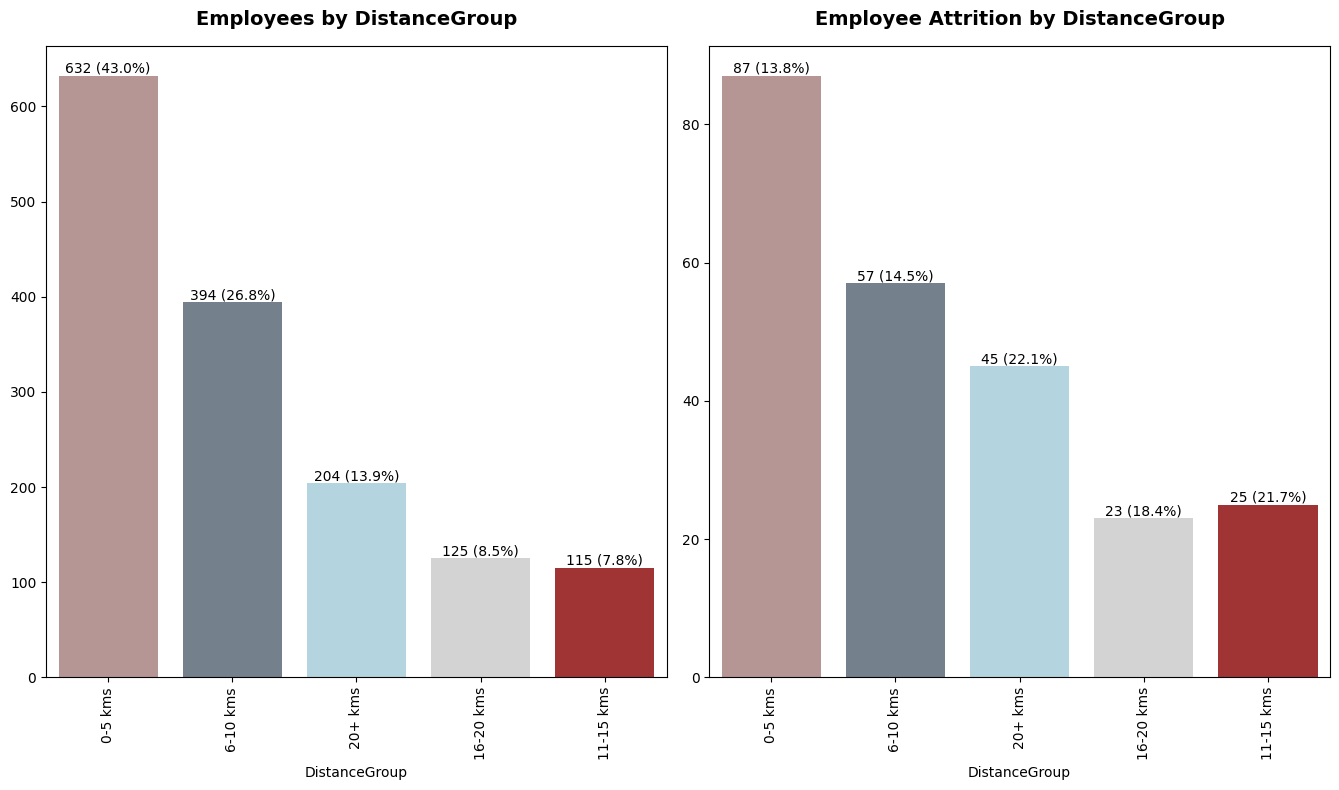

In [53]:
count_percent_plot(df, 'DistanceGroup', 'Attrition')

### 21 Analyzing Employee Attrition by Number of Companies Worked.

In [54]:
print("Total Unique Values in 'NumCompaniesWorked' Attribute is =>",df["NumCompaniesWorked"].nunique())

Total Unique Values in 'NumCompaniesWorked' Attribute is => 10


In [55]:
df["NumCompaniesWorked"].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1470.0  2.693197  2.498009  0.0  1.0  2.0  4.0  9.0

In [56]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

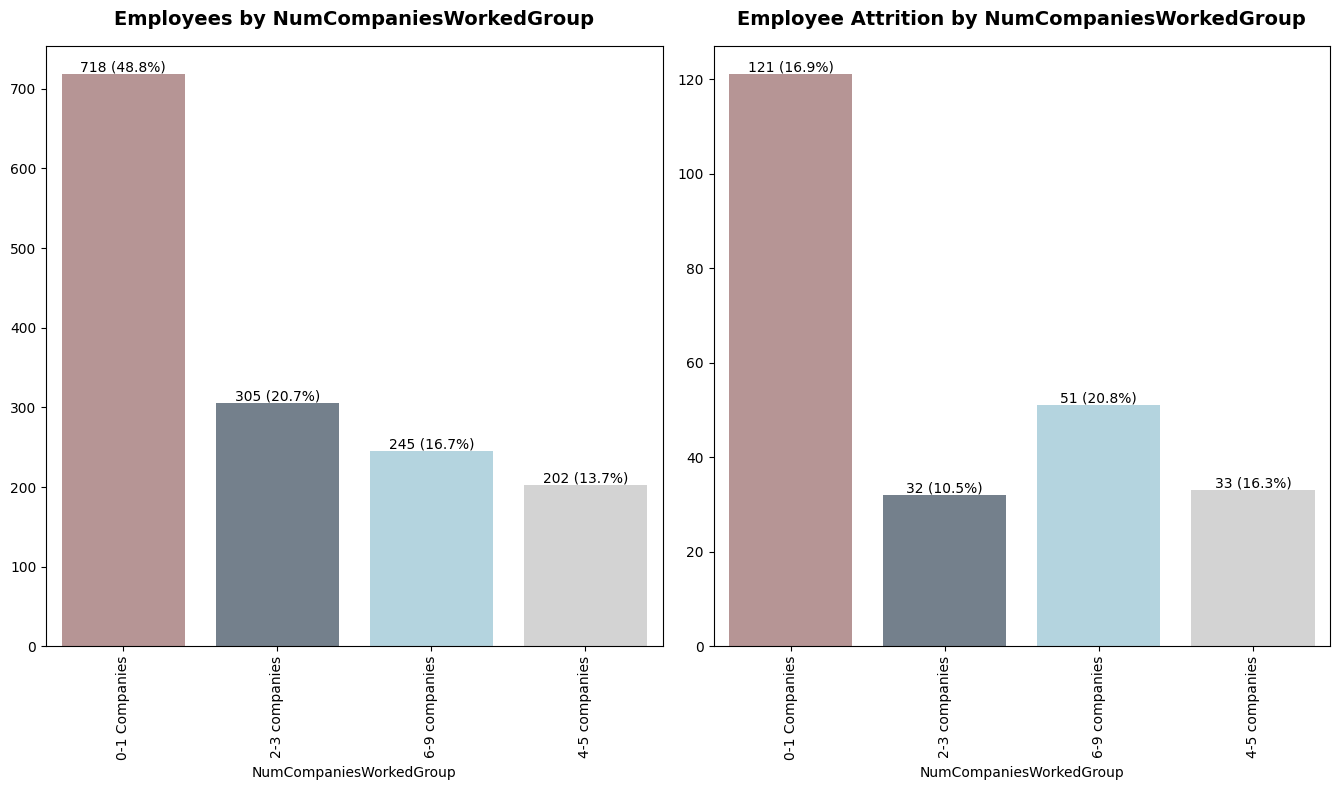

In [57]:
count_percent_plot(df, 'NumCompaniesWorkedGroup', 'Attrition')

#### 22. Analyzing Employee Attrition by Percentage Salary Hike.

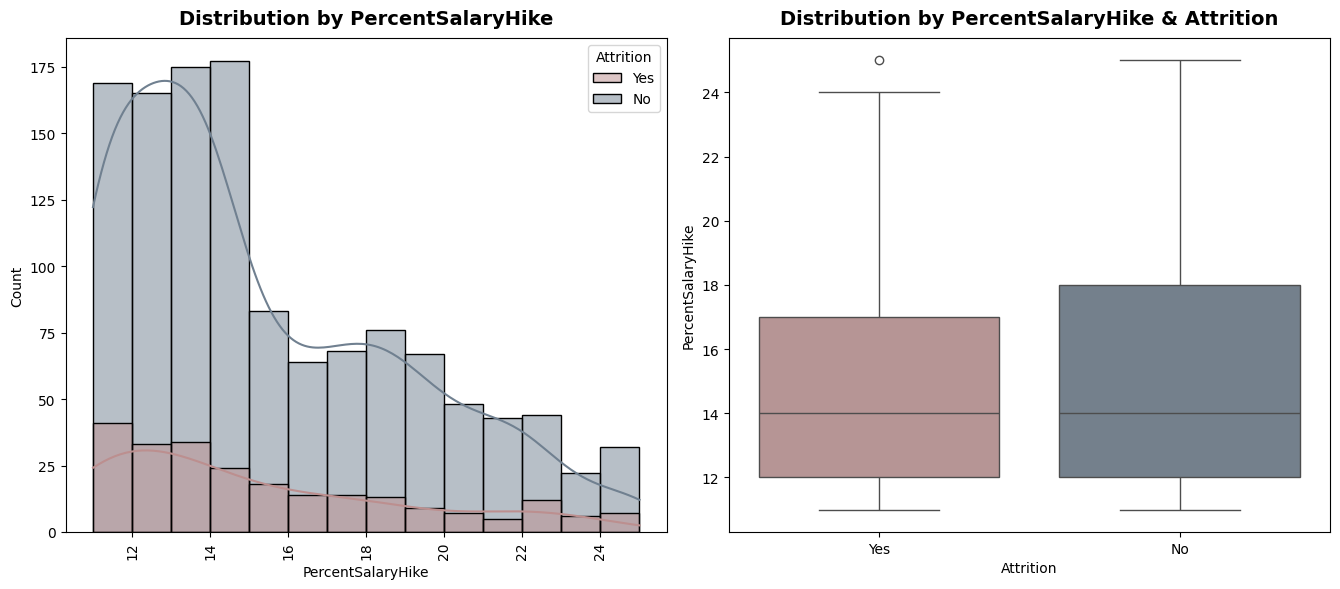

In [58]:
hist_with_hue(df, 'PercentSalaryHike', 'Attrition')

#### 23. Analyzing Employee Attrition by Total Working Years.

In [59]:
print("Total Unique Values in 'TotalWorkingYears' Attribute is =>",df["TotalWorkingYears"].nunique())

Total Unique Values in 'TotalWorkingYears' Attribute is => 40


In [60]:
df["TotalWorkingYears"].describe().to_frame().T

count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1470.0  11.279592  7.780782  0.0  6.0  10.0  15.0  40.0

In [61]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

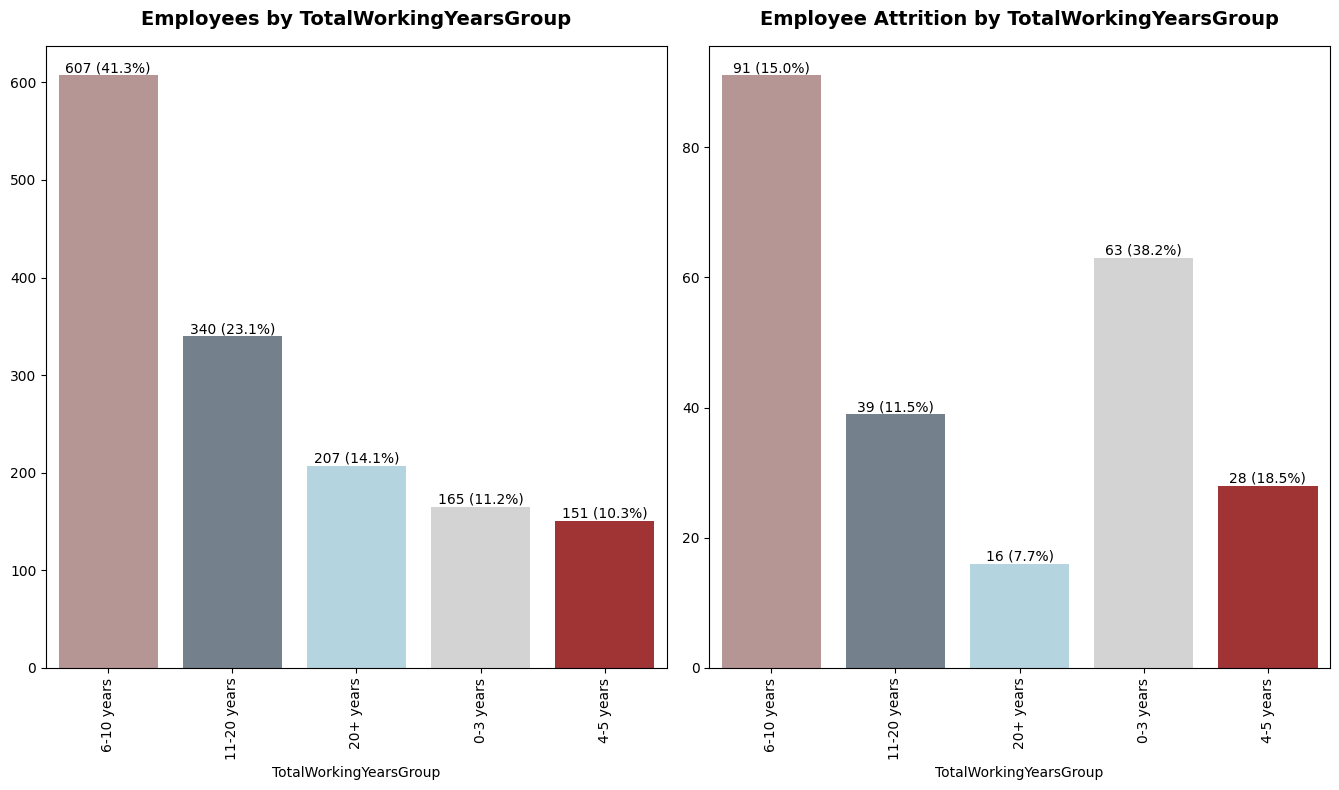

In [62]:
count_percent_plot(df, 'TotalWorkingYearsGroup', 'Attrition')

#### 24. Analyzing Employee Attrition by Years at Company.

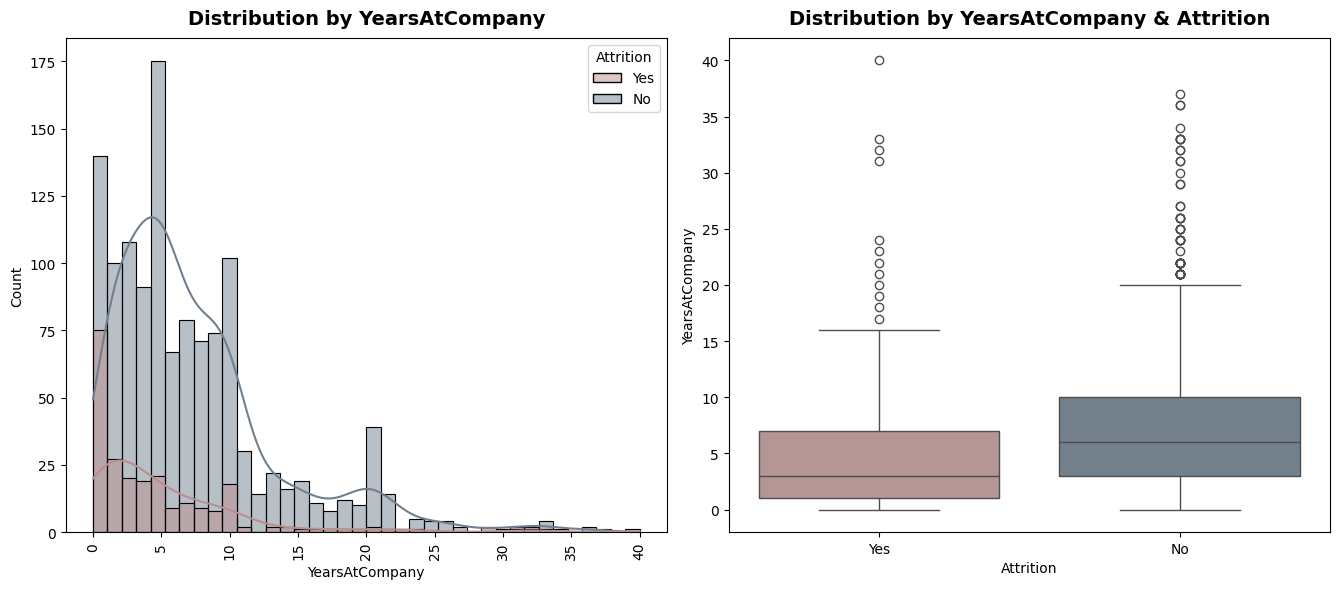

In [63]:
hist_with_hue(df, 'YearsAtCompany', 'Attrition')

#### 25. Analyzing Employee Attrition by Years In Current Role

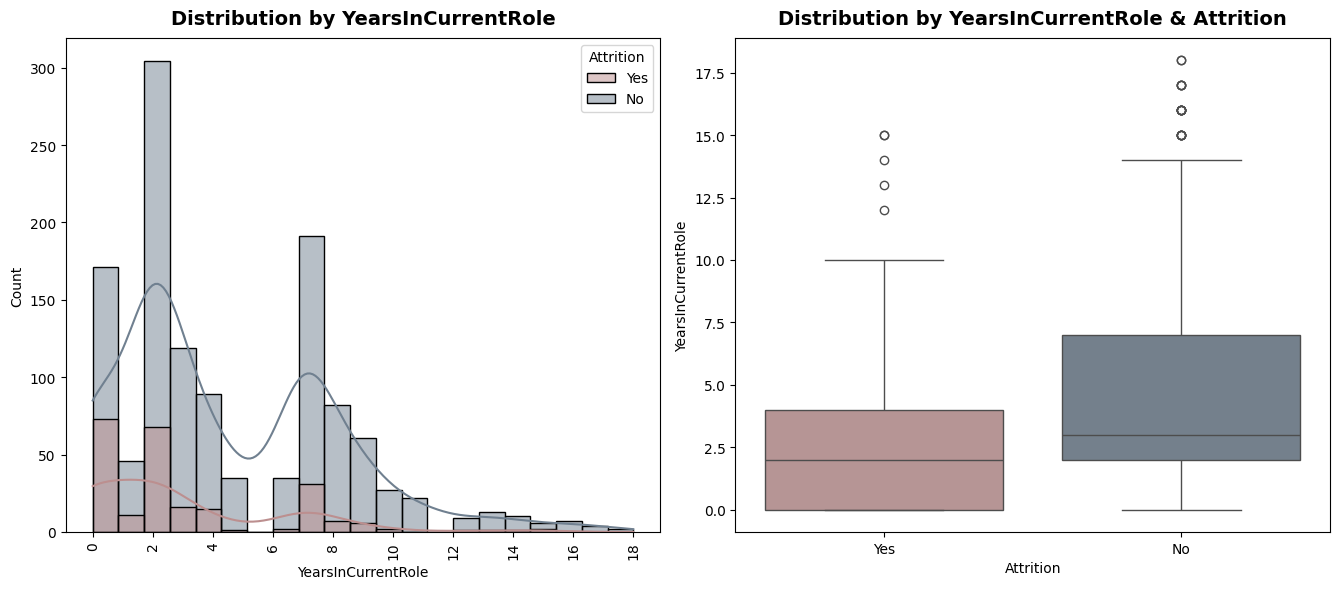

In [64]:
hist_with_hue(df, 'YearsInCurrentRole', 'Attrition')

#### 26. Analyzing Employee Attrition by Years Since Last Promotion

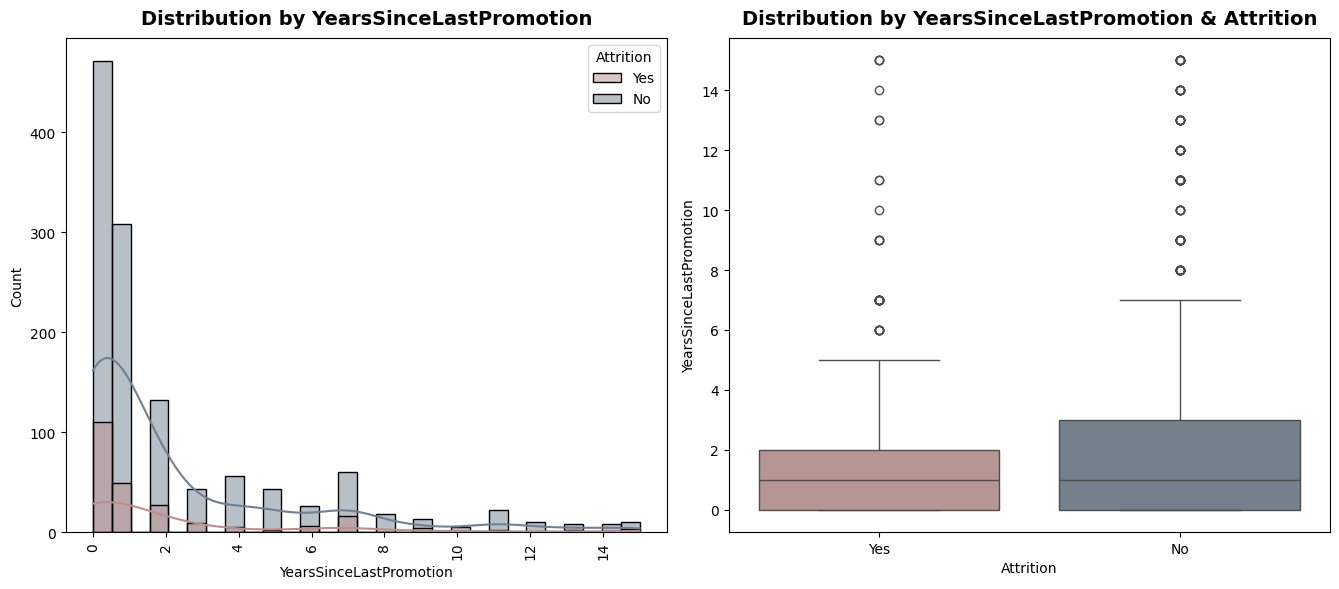

In [65]:
hist_with_hue(df, 'YearsSinceLastPromotion', 'Attrition')

#### 27. Analyzing Employee Attrition by Years with Current Manager.

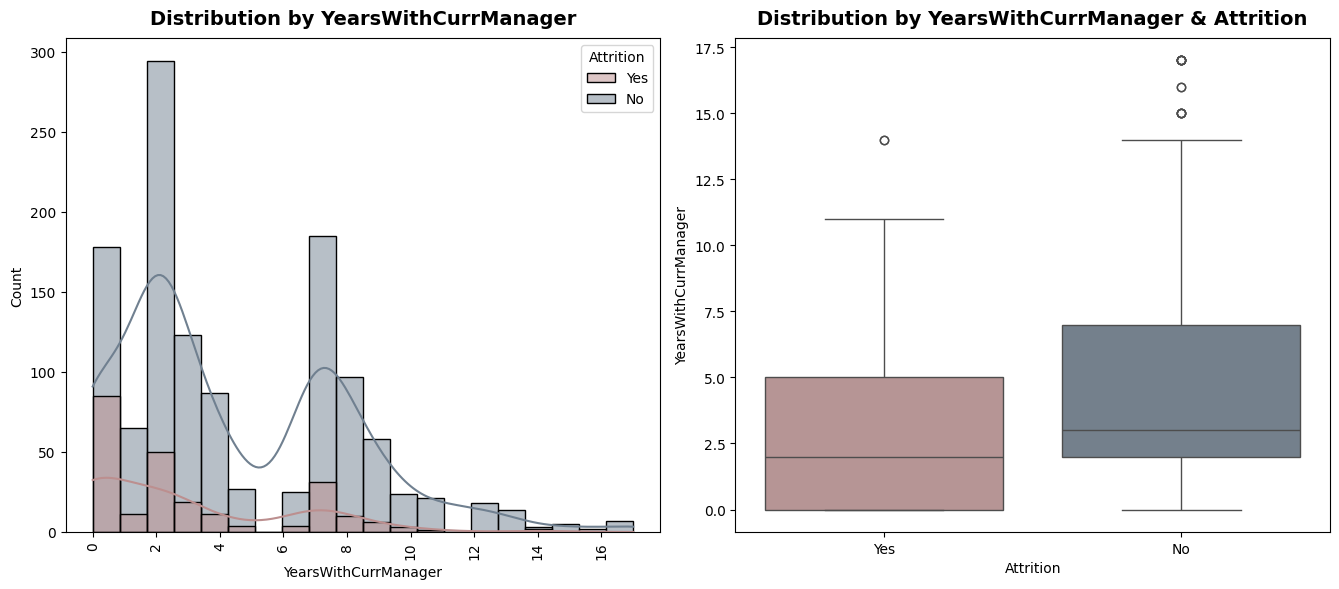

In [66]:
hist_with_hue(df, 'YearsWithCurrManager', 'Attrition')

## Statistical Analysis - Feature Importance 

In [67]:
num_cols = df.select_dtypes(np.number).columns

In [68]:
new_data = df.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [69]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

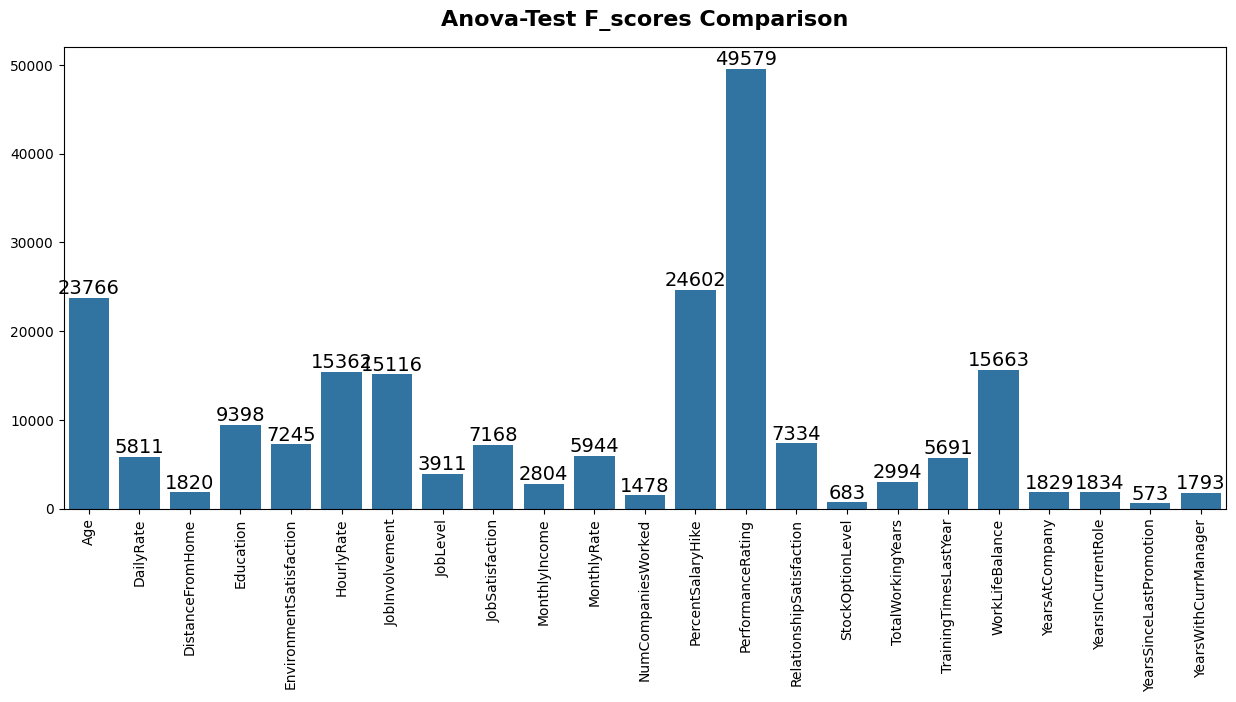

In [70]:
# Visualizing the F_Score of ANOVA Test of Each Numerical features.
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

In [71]:
#Comparing F_Score and P_value of ANOVA Test.
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

Features       F_Score                 P_value
0                        Age  23766.934042  0.00000000000000000000
1                  DailyRate   5811.796569  0.00000000000000000000
2           DistanceFromHome   1820.614585  0.00000000000000000000
3                  Education   9398.987566  0.00000000000000000000
4    EnvironmentSatisfaction   7245.704914  0.00000000000000000000
5                 HourlyRate  15362.122371  0.00000000000000000000
6             JobInvolvement  15116.579563  0.00000000000000000000
7                   JobLevel   3911.331585  0.00000000000000000000
8            JobSatisfaction   7168.703089  0.00000000000000000000
9              MonthlyIncome   2804.459632  0.00000000000000000000
10               MonthlyRate   5944.089071  0.00000000000000000000
11        NumCompaniesWorked   1478.188633  0.00000000000000000000
12         PercentSalaryHike  24602.507947  0.00000000000000000000
13         PerformanceRating  49579.088833  0.00000000000000000000
14  RelationshipSatisfaction   7334.250922  0.00000000000000000000
15          StockOptionLevel    683.069576  0.00000000000000000000
16         TotalWorkingYears   2994.906310  0.00000000000000000000
17     TrainingTimesLastYear   5691.401732  0.00000000000000000000
18           WorkLifeBalance  15663.161434  0.00000000000000000000
19            YearsAtCompany   1829.442766  0.00000000000000000000
20        YearsInCurrentRole   1834.262264  0.00000000000000000000
21   YearsSinceLastPromotion    573.896430  0.00000000000000000000
22      YearsWithCurrManager   1793.291314  0.00000000000000000000

In [72]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [73]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

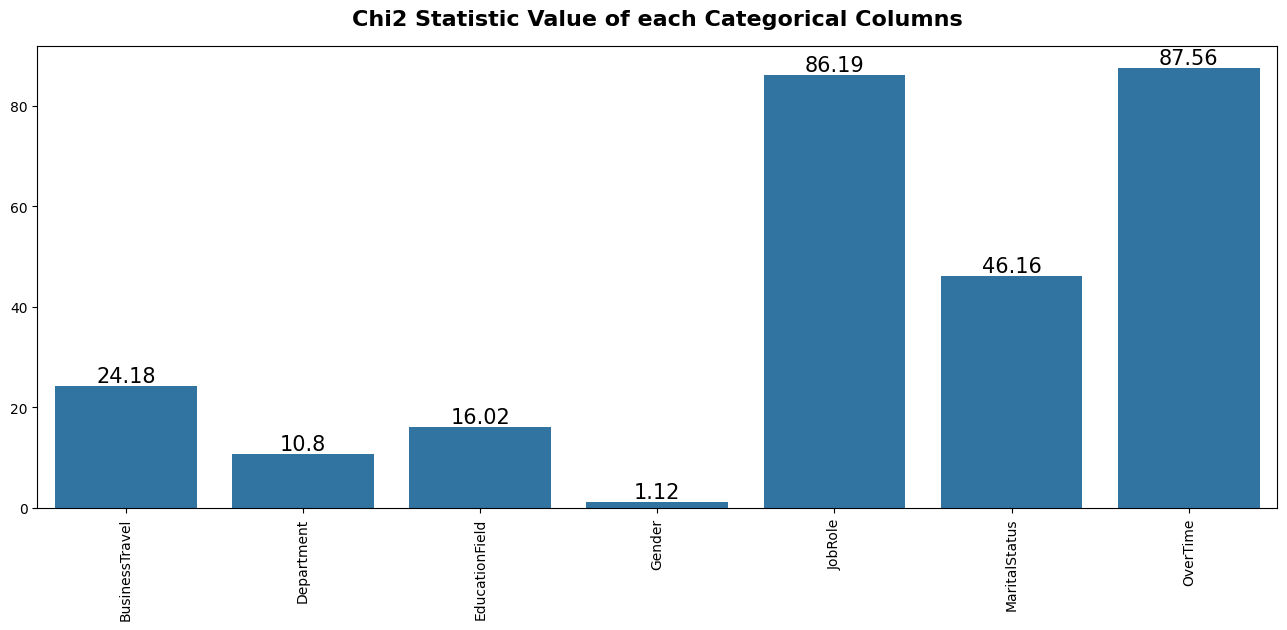

In [74]:
# Visualizing the Chi-Square Statistic Values of Each Categorical Features.
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

### Compairing Chi2_Statistic and P_value of Chi_Square Test.

In [75]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

Features  Chi_2 Statistic                 P_value
0  BusinessTravel        24.182414  0.00000560861447644993
1      Department        10.796007  0.00452560657447963373
2  EducationField        16.024674  0.00677398013902521298
3          Gender         1.116967  0.29057244902890855265
4         JobRole        86.190254  0.00000000000000275248
5   MaritalStatus        46.163677  0.00000000009455511060
6        OverTime        87.564294  0.00000000000000000001

## Encoding 

In [76]:
# droping the columns which we have created for analysis purpose
cols = ["DistanceGroup", "NumCompaniesWorkedGroup", "TotalWorkingYearsGroup"]
df.drop(columns=cols, inplace=True)

In [77]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [78]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [80]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [81]:
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

In [82]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [83]:
df = pd.concat([df,encoded_df],axis=1)

In [84]:
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)

## Correlation Matrix 

<Axes: title={'center': 'Correlation Plot'}>

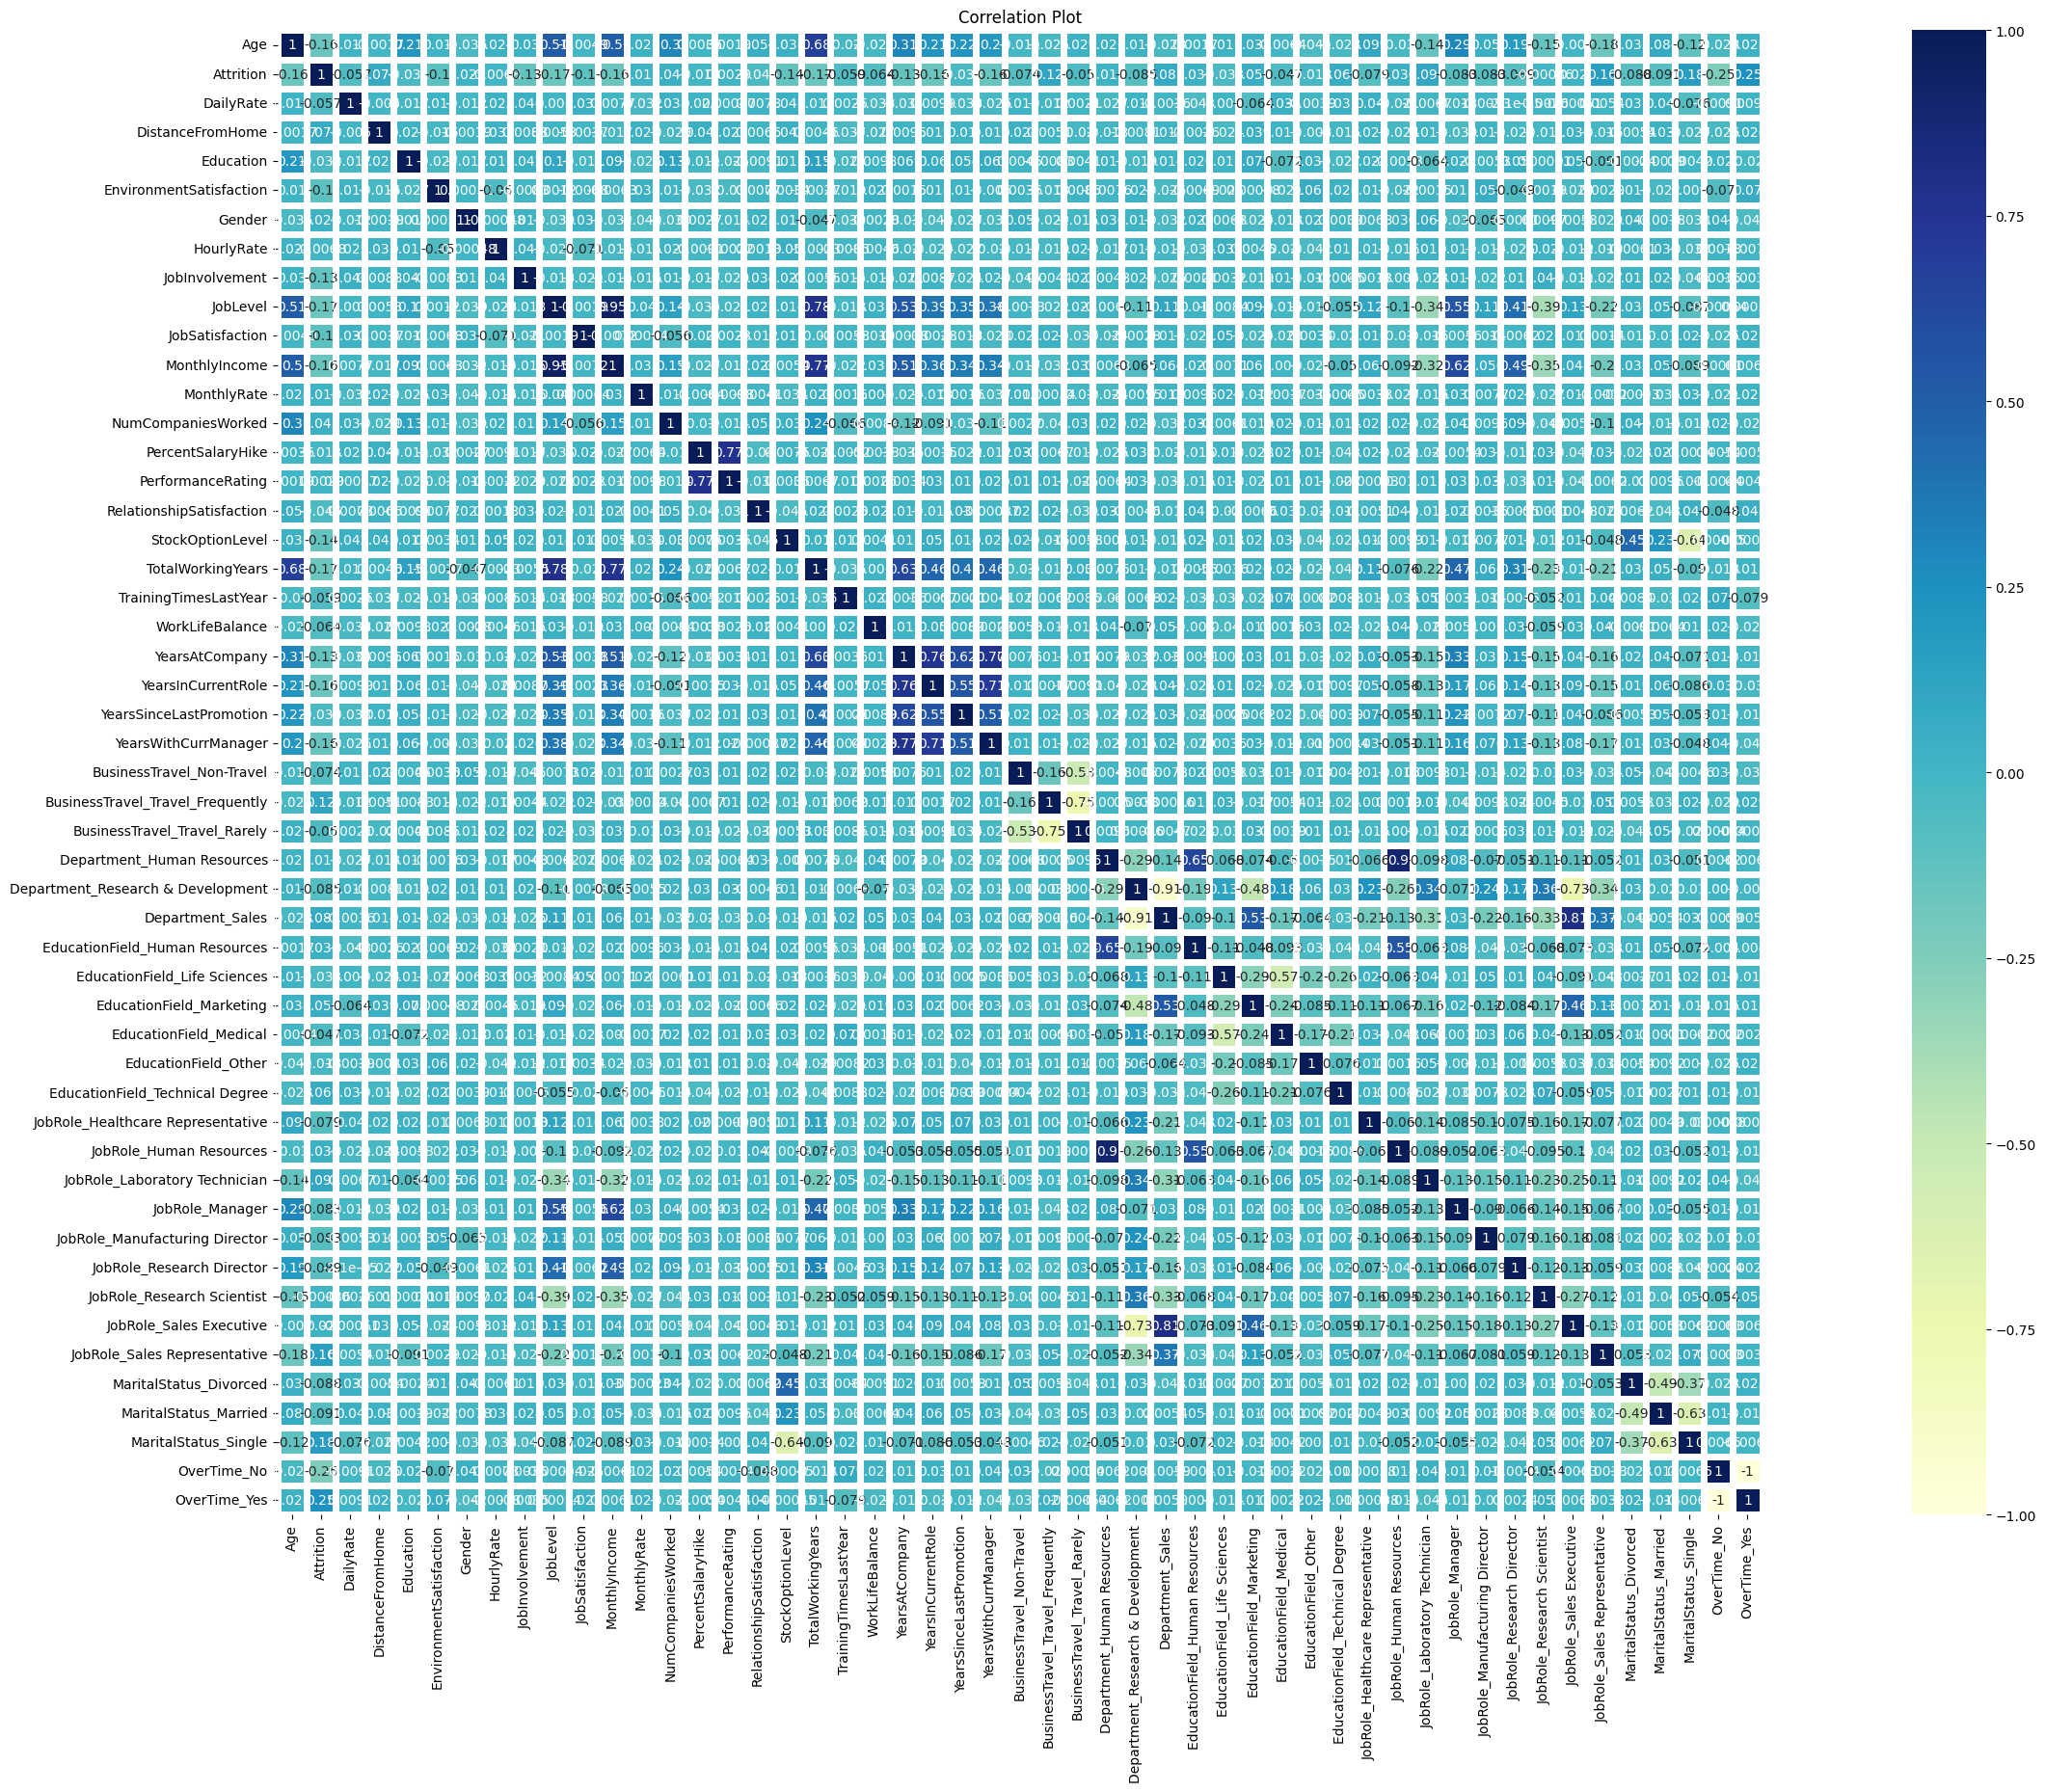

In [85]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [86]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [87]:
# droping columns which are highly correlated

cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df.drop(columns=cols, inplace=True)

## Split the Data into Independent and Dependent Variable 

In [88]:
x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

In [137]:
y

Attrition
0             1
1             0
2             1
3             0
4             0
...         ...
1465          0
1466          0
1467          0
1468          0
1469          0

[1470 rows x 1 columns]

## Balance the Dataset using SMOTE 

In [89]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0            1233
1             237
Name: count, dtype: int64

After Smoote Attrition
0            1233
1            1233
Name: count, dtype: int64


## Feature Scaling 

In [90]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [91]:
x_smote

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
2461   27        184                 5          2                        2   
2462   33       1231                14          1                        1   
2463   38        359                22          3                        3   
2464   29        438                10          3                        2   
2465   24       1306                 8          3                        1   

      Gender  HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  \
0          0          94               3                4           5993   
1          1          61               2                2           5130   
2          1          92               2                3           2090   
3          0          56               3                3           2909   
4          1          40               3                2           3468   
...      ...         ...             ...              ...            ...   
2461       0          64               3                2           2435   
2462       0          56               2                3          13890   
2463       1          92               2                1           3899   
2464       0          63               1                1           2371   
2465       0          53               3                2           2825   

      MonthlyRate  NumCompaniesWorked  PerformanceRating  \
0           19479                   8                  3   
1           24907                   1                  4   
2            2396                   6                  3   
3           23159                   1                  3   
4           16632                   9                  3   
...           ...                 ...                ...   
2461        25822                   0                  3   
2462        24674                   6                  3   
2463        22150                   0                  3   
2464        14544                   1                  3   
2465        14169                   1                  3   

      RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                            1                 0                      0   
1                            4                 1                      3   
2                            2                 0                      3   
3                            3                 0                      3   
4                            4                 1                      3   
...                        ...               ...                    ...   
2461                         1                 0                      2   
2462                         4                 0                      2   
2463                         1                 0                      1   
2464                         3                 0                      2   
2465                         4                 1                      3   

      WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  \
0                   1               6                        0   
1                   3              10                        1   
2                   3               0                        0   
3                   3               8                        3   
4                   3               2                        2   
...               ...             ...                      ...   
2461                3               2                        0   
2462  

In [92]:
x_scaled = scaler.fit_transform(x_smote)

In [93]:
x_scaled

array([[ 0.63152654,  0.85643121, -1.13217631, ...,  1.34631466,
        -1.37309386,  1.37309386],
       [ 1.52939017, -1.30427666, -0.21785456, ..., -0.86971436,
         0.86120488, -0.86120488],
       [ 0.18259473,  1.56791581, -1.00155892, ...,  1.34631466,
        -1.37309386,  1.37309386],
       ...,
       [ 0.29482768, -1.0942443 ,  1.61078896, ...,  1.32512431,
         0.83983983, -0.83983983],
       [-0.71526889, -0.88683735,  0.04338023, ...,  0.16212076,
         0.86120488, -0.86120488],
       [-1.27643366,  1.39201372, -0.21785456, ..., -0.86971436,
        -1.37309386,  1.37309386]])

## Split the Data into Training and Test 

### Split the Data into Training and Test (UnScaled) 

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

### Split the Data into Training and Test (scaled) 

In [95]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

## Import Machine Learning Algorithms

In [96]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

## Model Building </div>

In [97]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []

## Model Building for Scaled Data

In [98]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    f = f1_score(y_test1,x_test_pred1)
    g = cohen_kappa_score(y_test1, x_test_pred1)
    h = balanced_accuracy_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"ROC_AUC Score of {model} model is:", e)
    print(f"f1 Score of {model} model is:", f)
    print(f"kappa Score of {model} model is:", g)
    print(f"G_mean Score of {model} model is:", h)
 
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

### Logistic Regression Model 


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 86.20689655172413
Accuracy_Score of LogisticRegression() model on Testing Data is: 84.61538461538461
Precision Score of LogisticRegression() model is: 0.8414634146341463
Recall Score of LogisticRegression() model is: 0.8483606557377049
ROC_AUC Score of LogisticRegression() model is: 0.921704918032787
f1 Score of LogisticRegression() model is: 0.8448979591836735
kappa Score of LogisticRegression() model is: 0.6922925613874045
G_mean Score of LogisticRegression() model is: 0.8461803278688524

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       250
           1       0.84      0.85      0.84       244

    accuracy                           0.85       494
   macro avg     

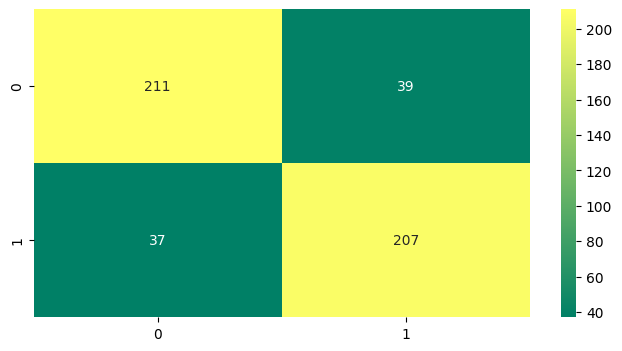


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


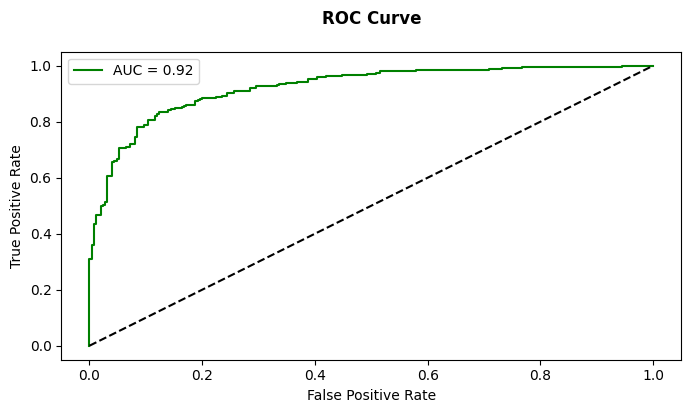

In [99]:
model_prediction(LogisticRegression())

### K Nearest Neighbor (KNN) 


------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 91.32860040567951
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 88.25910931174089
Precision Score of KNeighborsClassifier() model is: 0.8251748251748252
Recall Score of KNeighborsClassifier() model is: 0.9672131147540983
ROC_AUC Score of KNeighborsClassifier() model is: 0.9634590163934427
f1 Score of KNeighborsClassifier() model is: 0.8905660377358491
kappa Score of KNeighborsClassifier() model is: 0.7656316461080391
G_mean Score of KNeighborsClassifier() model is: 0.8836065573770492

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       250
           1       0.83      0.97      0.89       244

    accuracy                           0.88       49

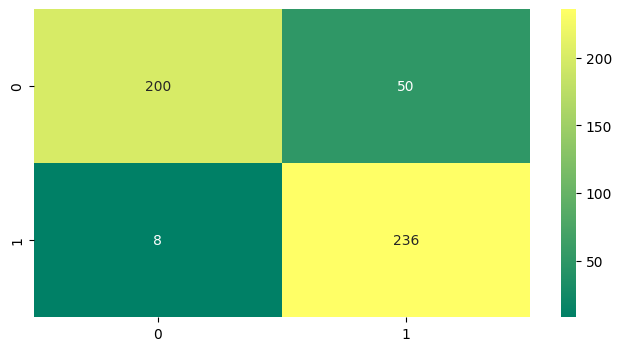


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


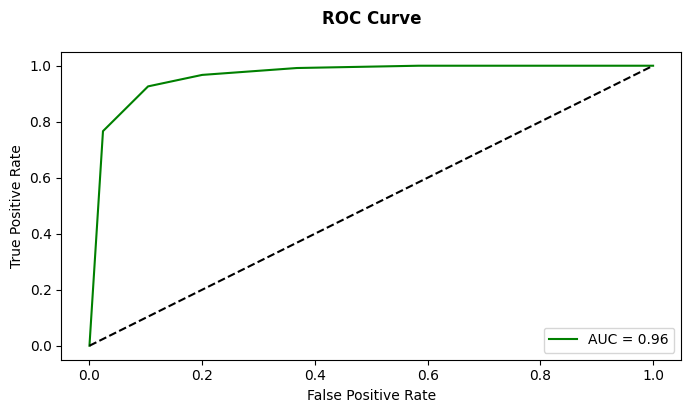

In [100]:
model_prediction(KNeighborsClassifier())

### Naive Bayes 


------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 76.92697768762677
Accuracy_Score of GaussianNB() model on Testing Data is: 75.91093117408907
Precision Score of GaussianNB() model is: 0.7104377104377104
Recall Score of GaussianNB() model is: 0.8647540983606558
ROC_AUC Score of GaussianNB() model is: 0.8560491803278689
f1 Score of GaussianNB() model is: 0.7800369685767098
kappa Score of GaussianNB() model is: 0.5194002518026782
G_mean Score of GaussianNB() model is: 0.7603770491803279

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       250
           1       0.71      0.86      0.78       244

    accuracy                           0.76       494
   macro avg       0.77      0.76      0.76       494
weighted avg       0.77      0.76 

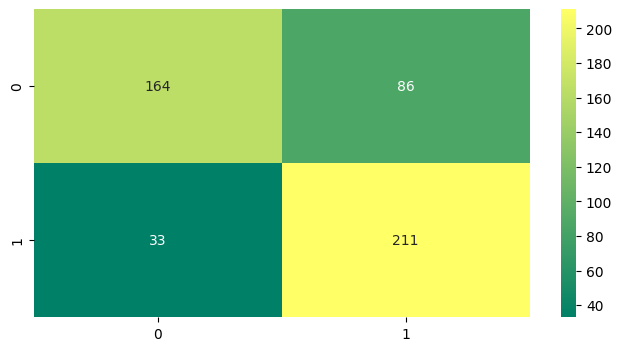


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


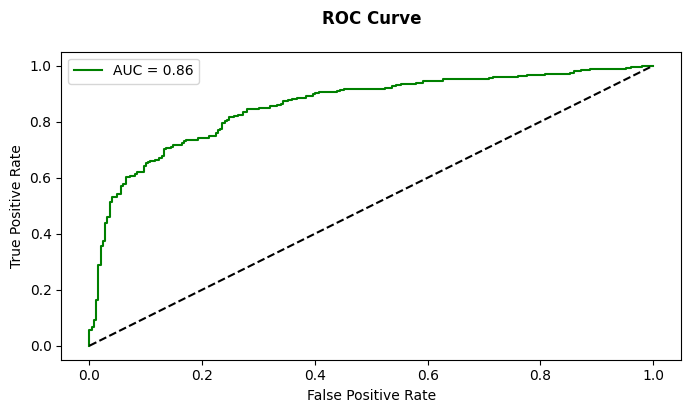

In [101]:
model_prediction(GaussianNB())

## Model Building for Unscaled Data 

In [102]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f = f1_score(y_test,x_test_pred)
    g = cohen_kappa_score(y_test, x_test_pred)
    h = balanced_accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

### Decision Tree 


------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 87.04453441295547
Precision Score of DecisionTreeClassifier() model is: 0.8435114503816794
Recall Score of DecisionTreeClassifier() model is: 0.9057377049180327
AUC Score of DecisionTreeClassifier() model is: 0.8708688524590164

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       250
           1       0.84      0.91      0.87       244

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494


------------------------------------------------------------------------
Confusion Matrix o

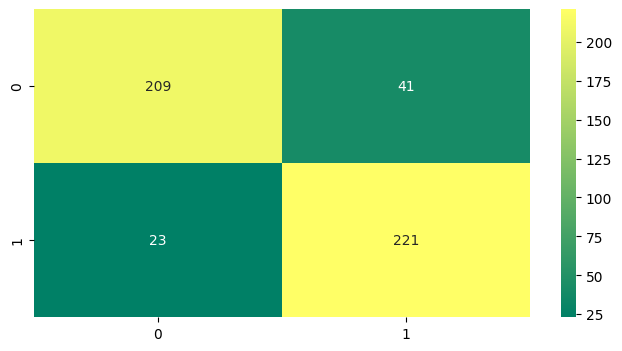


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


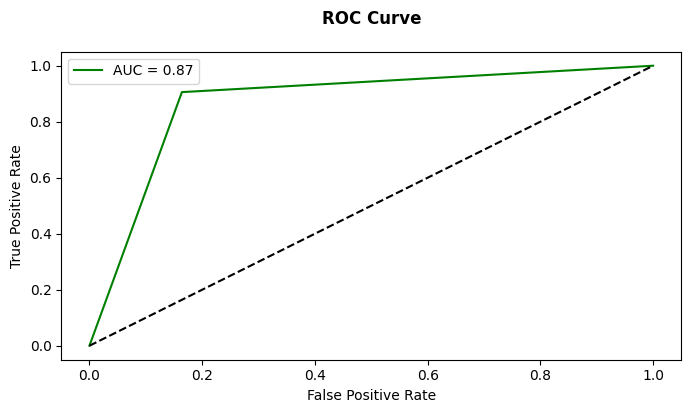

In [103]:
model_prediction(DecisionTreeClassifier())

### Random Forest 


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 92.91497975708502
Precision Score of RandomForestClassifier() model is: 0.968609865470852
Recall Score of RandomForestClassifier() model is: 0.8852459016393442
AUC Score of RandomForestClassifier() model is: 0.9781639344262295

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.97      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of

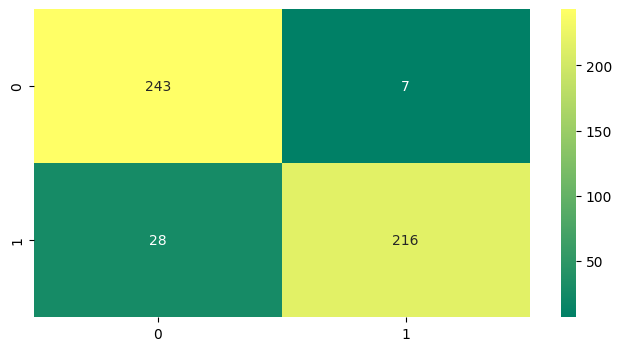


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


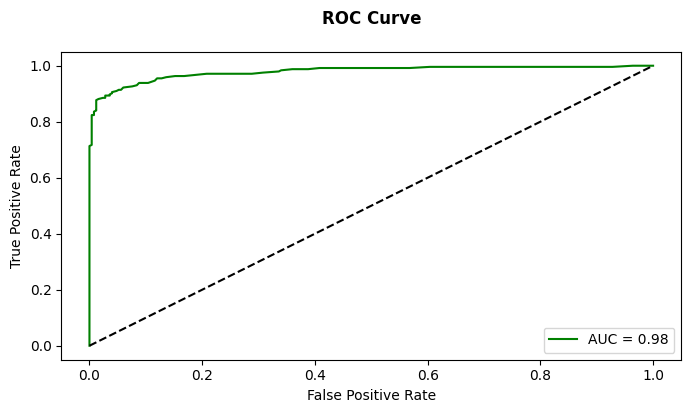

In [104]:
model_prediction(RandomForestClassifier())

### Ada Boost 


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier() model on Training Data is: 92.64705882352942
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 90.48582995951418
Precision Score of AdaBoostClassifier() model is: 0.9121338912133892
Recall Score of AdaBoostClassifier() model is: 0.8934426229508197
AUC Score of AdaBoostClassifier() model is: 0.9554590163934426

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       250
           1       0.91      0.89      0.90       244

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494


------------------------------------------------------------------------
Confusion Matrix of AdaBoostCl

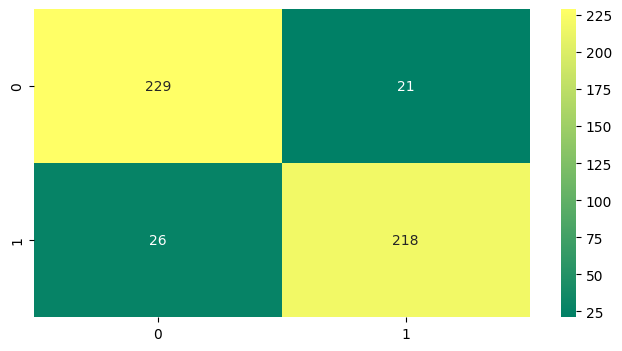


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier() model is:


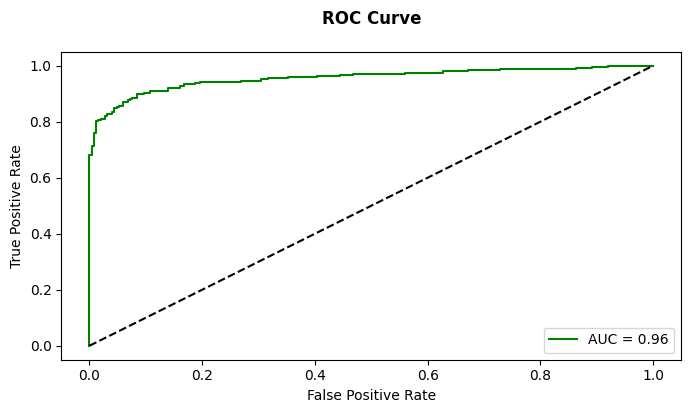

In [105]:
model_prediction(AdaBoostClassifier())

### Gradient Boosting 


------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 96.90669371196755
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 93.11740890688259
Precision Score of GradientBoostingClassifier() model is: 0.9565217391304348
Recall Score of GradientBoostingClassifier() model is: 0.9016393442622951
AUC Score of GradientBoostingClassifier() model is: 0.9657540983606557

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       250
           1       0.96      0.90      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


-------------------------------------------------------

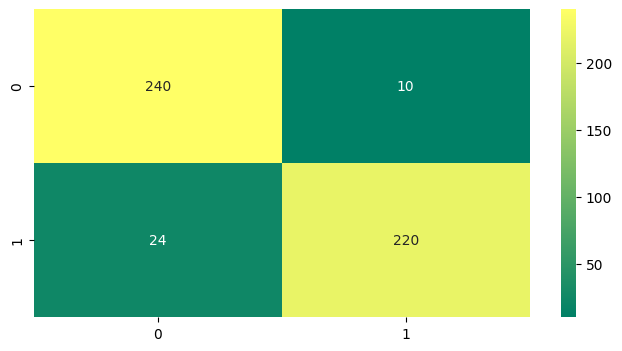


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


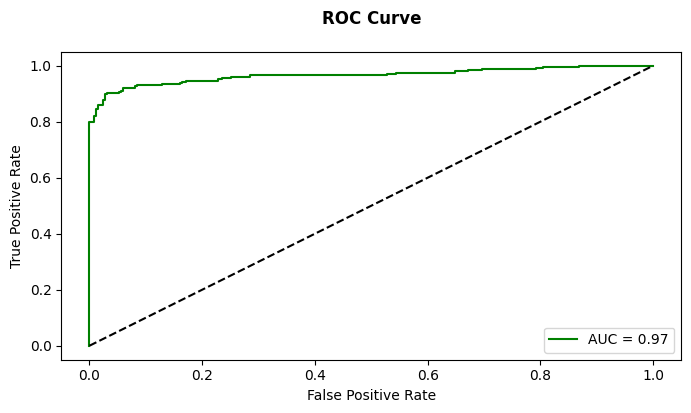

In [106]:
model_prediction(GradientBoostingClassifier())

### XG Boost


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

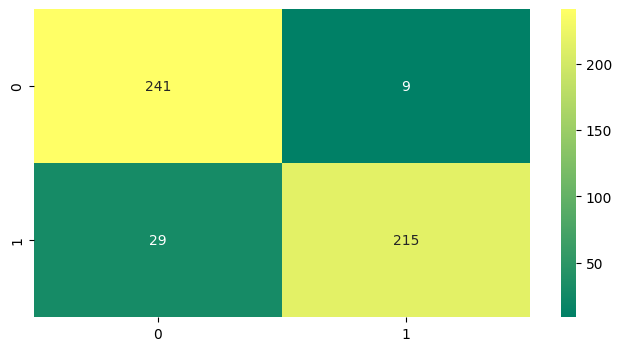


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


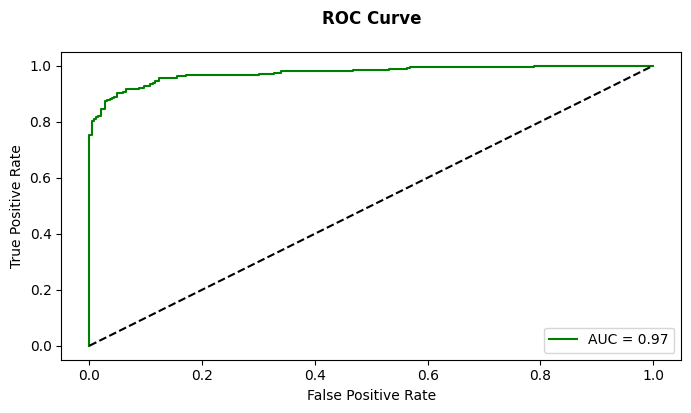

In [107]:
model_prediction(XGBClassifier())

### CatBoost 

Learning rate set to 0.013768
0:	learn: 0.6814840	total: 161ms	remaining: 2m 40s
1:	learn: 0.6704574	total: 181ms	remaining: 1m 30s
2:	learn: 0.6607095	total: 203ms	remaining: 1m 7s
3:	learn: 0.6495069	total: 224ms	remaining: 55.7s
4:	learn: 0.6388991	total: 243ms	remaining: 48.4s
5:	learn: 0.6289370	total: 262ms	remaining: 43.5s
6:	learn: 0.6206084	total: 281ms	remaining: 39.9s
7:	learn: 0.6105879	total: 300ms	remaining: 37.2s
8:	learn: 0.6004807	total: 318ms	remaining: 35s
9:	learn: 0.5901972	total: 337ms	remaining: 33.3s
10:	learn: 0.5814671	total: 356ms	remaining: 32s
11:	learn: 0.5743222	total: 374ms	remaining: 30.8s
12:	learn: 0.5661558	total: 395ms	remaining: 30s
13:	learn: 0.5583959	total: 415ms	remaining: 29.2s
14:	learn: 0.5520206	total: 435ms	remaining: 28.6s
15:	learn: 0.5454506	total: 453ms	remaining: 27.9s
16:	learn: 0.5389002	total: 472ms	remaining: 27.3s
17:	learn: 0.5312339	total: 491ms	remaining: 26.8s
18:	learn: 0.5234089	total: 510ms	remaining: 26.4s
19:	learn: 0.51

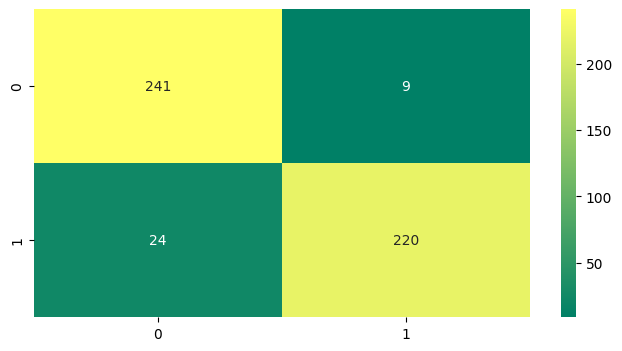


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x0000023305631EE0> model is:


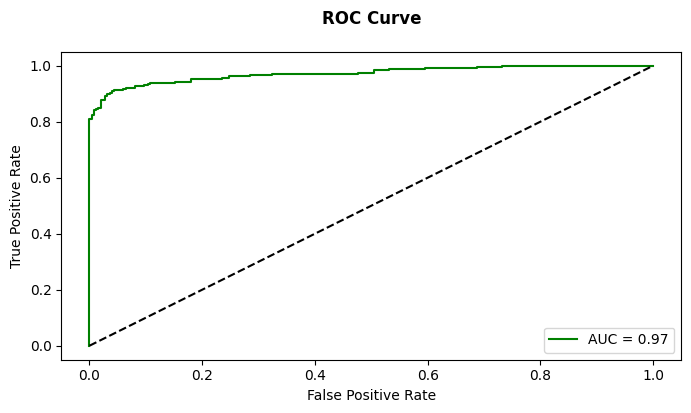

In [108]:
model_prediction(CatBoostClassifier())

### LgbmClassifier 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 989, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4206
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501521 -> initscore=0.006085
[LightGBM] [Info] Start training from score 0.006085

------------------------------------------------------------------------
Accuracy_Score of LGBMClassifier() model on Training Data is: 100.0
Accuracy_Score of LGBMClassifier() model on Testing Data is: 92.3076923076923
Precision Score of LGBMClassifier() model is: 0.9517543859649122
Recall Score of LGBMClassifier() model is: 0.889344262295082
AUC Score of LGBMClassi

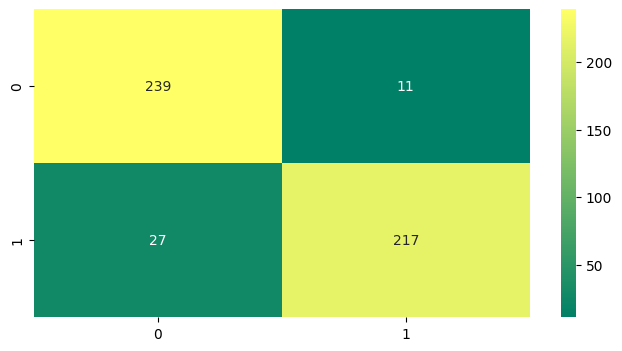


------------------------------------------------------------------------
ROC - AUC Curve of LGBMClassifier() model is:


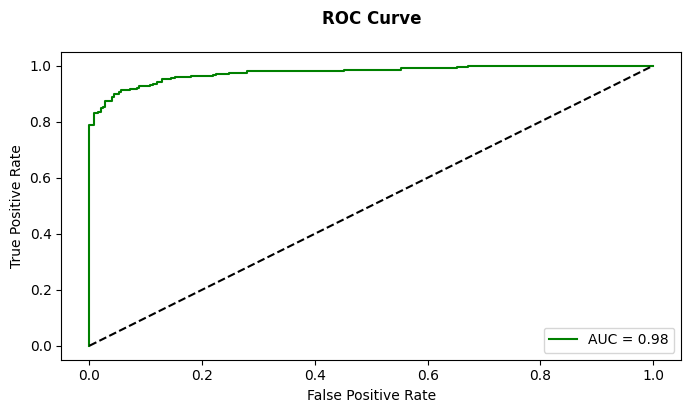

In [109]:
model_prediction(LGBMClassifier())

### Creating a DataFrame for Storing Result 

In [110]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","CatBoost","LGBM classifier"]

In [111]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Precision": precission,
                   "Recall": recall,
                   "ROC_AUC Score": Roc_Auc_score,
                   "f1_Score": f1_score_,
                   "Kappa_Score": kappa_score,
                   "G_Mean": G_Mean})
df

Algorithms  Training Score  Testing Score  Precision    Recall  \
0  Logistic Regression       86.206897      84.615385   0.841463  0.848361   
1                  KNN       91.328600      88.259109   0.825175  0.967213   
2          Naive Bayes       76.926978      75.910931   0.710438  0.864754   
3        Decision Tree      100.000000      87.044534   0.843511  0.905738   
4        Random Forest      100.000000      92.914980   0.968610  0.885246   
5            Ada Boost       92.647059      90.485830   0.912134  0.893443   
6       Gradient Boost       96.906694      93.117409   0.956522  0.901639   
7              XGBoost      100.000000      92.307692   0.959821  0.881148   
8             CatBoost       99.594320      93.319838   0.960699  0.901639   
9      LGBM classifier      100.000000      92.307692   0.951754  0.889344   

   ROC_AUC Score  f1_Score  Kappa_Score    G_Mean  
0       0.921705  0.844898     0.692293  0.846180  
1       0.963459  0.890566     0.765632  0.883607  
2       0.856049  0.780037     0.519400  0.760377  
3       0.870869  0.873518     0.741082  0.870869  
4       0.978164  0.925054     0.858132  0.928623  
5       0.955459  0.902692     0.809642  0.904721  
6       0.965754  0.928270     0.862233  0.930820  
7       0.974098  0.918803     0.845980  0.922574  
8       0.971672  0.930233     0.866278  0.932820  
9       0.975082  0.919492     0.846010  0.922672

In [112]:
# Adaboost, Gradient Boosting & CatBoost Model are having High Test Accuracy and AUC Score.

## Hypertuning  Selected Models 

### Optimising Catboost

In [115]:
'''def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 10, 2000, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 100, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 20.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1.0, 2.0),
        'depth': trial.suggest_int('depth', 1, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'task_type': 'GPU',
        'random_seed': 1,
        'verbose': False
    }

    try:
        cb = CatBoostClassifier(**params)

        # Train the model
        cb.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=50, verbose=100)

        # Make the predictions
        y_pred = cb.predict(x_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        return accuracy
    except CatBoostError as e:
        # Handle CatBoostError by returning a low accuracy
        print(f"Trial {trial.number} failed with CatBoostError: {e}")
        return 0.0  # You can adjust this value based on your preference

# Create the Optuna study
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective, n_trials=30)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', study_catboost.best_params)
print('Best Test Accuracy:', study_catboost.best_value)
'''

'def objective(trial):\n    params = {\n        \'iterations\': trial.suggest_int(\'iterations\', 10, 2000, log=True),\n        \'learning_rate\': trial.suggest_float(\'learning_rate\', 0.01, 1.0, log=True),\n        \'l2_leaf_reg\': trial.suggest_float(\'l2_leaf_reg\', 1, 100, log=True),\n        \'bagging_temperature\': trial.suggest_float(\'bagging_temperature\', 0.1, 20.0, log=True),\n        \'random_strength\': trial.suggest_float(\'random_strength\', 1.0, 2.0),\n        \'depth\': trial.suggest_int(\'depth\', 1, 10),\n        \'min_data_in_leaf\': trial.suggest_int(\'min_data_in_leaf\', 1, 300),\n        \'task_type\': \'GPU\',\n        \'random_seed\': 1,\n        \'verbose\': False\n    }\n\n    try:\n        cb = CatBoostClassifier(**params)\n\n        # Train the model\n        cb.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=50, verbose=100)\n\n        # Make the predictions\n        y_pred = cb.predict(x_test)\n\n        # Calculate accuracy\n     

In [113]:
catboost_Best_hyperparameters = {'iterations': 651, 'learning_rate': 0.03356857796503744, 'l2_leaf_reg': 8.68165684728472, 'bagging_temperature': 7.120978423676909, 'random_strength': 1.9940130782713084, 'depth': 7, 'min_data_in_leaf': 122}

0:	learn: 0.6686205	total: 36.6ms	remaining: 23.8s
1:	learn: 0.6450941	total: 66ms	remaining: 21.4s
2:	learn: 0.6256317	total: 95.6ms	remaining: 20.7s
3:	learn: 0.6082088	total: 124ms	remaining: 20s
4:	learn: 0.5922260	total: 151ms	remaining: 19.6s
5:	learn: 0.5775605	total: 179ms	remaining: 19.3s
6:	learn: 0.5615070	total: 209ms	remaining: 19.3s
7:	learn: 0.5450416	total: 240ms	remaining: 19.3s
8:	learn: 0.5280204	total: 284ms	remaining: 20.3s
9:	learn: 0.5147149	total: 322ms	remaining: 20.7s
10:	learn: 0.5010167	total: 352ms	remaining: 20.5s
11:	learn: 0.4921313	total: 383ms	remaining: 20.4s
12:	learn: 0.4807843	total: 412ms	remaining: 20.2s
13:	learn: 0.4699551	total: 442ms	remaining: 20.1s
14:	learn: 0.4616388	total: 493ms	remaining: 20.9s
15:	learn: 0.4521552	total: 539ms	remaining: 21.4s
16:	learn: 0.4437785	total: 572ms	remaining: 21.3s
17:	learn: 0.4352437	total: 606ms	remaining: 21.3s
18:	learn: 0.4272234	total: 644ms	remaining: 21.4s
19:	learn: 0.4198121	total: 692ms	remainin

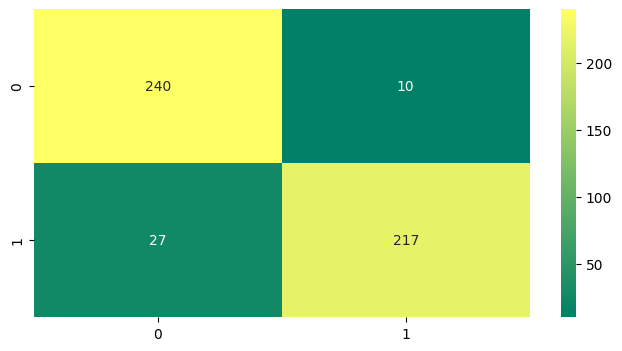


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x000002330583DD30> model is:


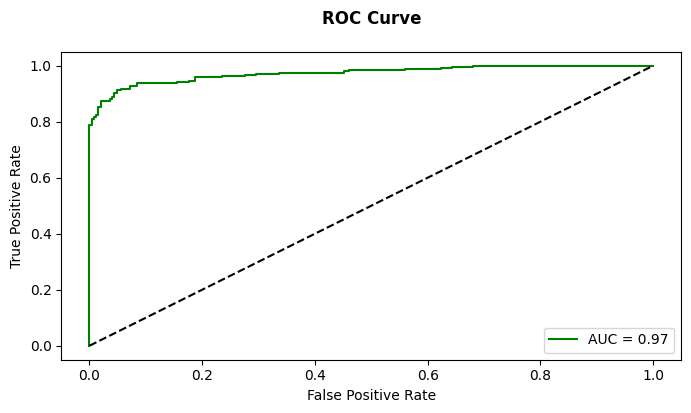

In [114]:
model_prediction(CatBoostClassifier(**catboost_Best_hyperparameters))

### Hyperparameter tuning for XGBoost with Optuna

In [116]:
RANDOM_SEED = np.random.seed(42)

In [ ]:
'''def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'eta': trial.suggest_float('eta', 0.001, 0.1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),
        'subsample': trial.suggest_float('subsample', 0.05, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    # Build the xgboost model
    optuna_xgbmodel = XGBClassifier(**params, random_state=RANDOM_SEED)
    
    # Train the model 
    optuna_xgbmodel.fit(x_train, y_train)
    
    # Make the predictions
    y_pred = optuna_xgbmodel.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', study.best_params)
print('Best Test Accuracy:', study.best_value)
'''

In [117]:
XGboost_Best_hyperparameters = {'alpha': 1.0828869784295189e-08, 'max_depth': 9, 'eta': 0.03353768080985071, 'gamma': 0.7309121971687413, 'colsample_bytree': 0.7618126951504659, 'subsample': 0.4105603727766567, 'min_child_weight': 2, 'n_estimators': 584, 'learning_rate': 0.06693301582532778, 'reg_alpha': 0.9517264929620095, 'reg_lambda': 0.7693580310442778}


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(alpha=1.0828869784295189e-08, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7618126951504659, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03353768080985071, eval_metric=None, feature_types=None,
              gamma=0.7309121971687413, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06693301582532778,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=584, n_jobs=None, ...) model on Training Data is: 98.98580121703854
Accuracy_Score of XGBClassifier(alpha=1.0828869784295189e

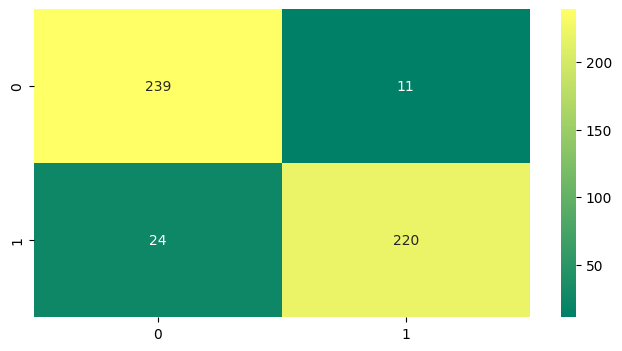


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(alpha=1.0828869784295189e-08, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7618126951504659, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03353768080985071, eval_metric=None, feature_types=None,
              gamma=0.7309121971687413, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06693301582532778,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=584, n_jobs=None, ...) model is:


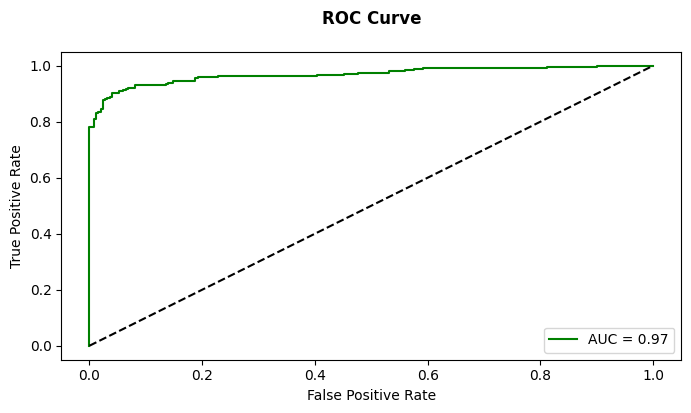

In [118]:
model_prediction(XGBClassifier(**XGboost_Best_hyperparameters, random_state=RANDOM_SEED))

### Hyperparameter tuning for AdaBoost with Optuna

In [ ]:
'''# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
        #'base_estimator__max_depth': trial.suggest_int('base_estimator__max_depth', 1, 10),
        #'base_estimator__min_samples_split': trial.suggest_int('base_estimator__min_samples_split', 2, 20),
        #'base_estimator__min_samples_leaf': trial.suggest_int('base_estimator__min_samples_leaf', 1, 10)
    }

    # Build the AdaBoost model
    adaboost_model = AdaBoostClassifier(**params, random_state=RANDOM_SEED)
    
    # Evaluate the model using cross-validation
    accuracy_scorer = make_scorer(accuracy_score)
    accuracies = cross_val_score(adaboost_model, x_train, y_train, cv=5, scoring=accuracy_scorer)

    # Return the average accuracy as the objective value
    return accuracies.mean()

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', study.best_params)
print('Best Test Accuracy:', study.best_value)
'''

In [119]:
Adaboost_Best_hyperparameters = {'n_estimators': 366, 'learning_rate': 0.9937295407270483, 'algorithm': 'SAMME'}


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model on Training Data is: 94.32048681541582
Accuracy_Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model on Testing Data is: 91.49797570850203
Precision Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.9391304347826087
Recall Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.8852459016393442
AUC Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.9614426229508196

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier(alg

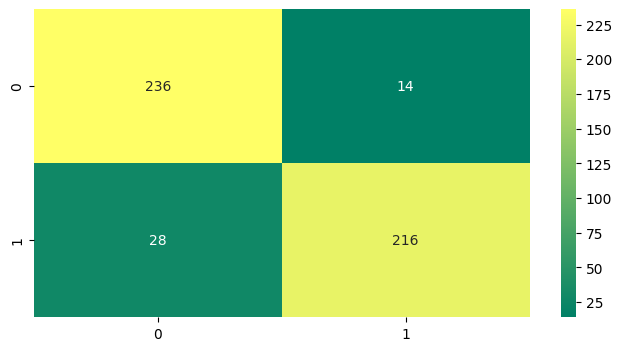


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is:


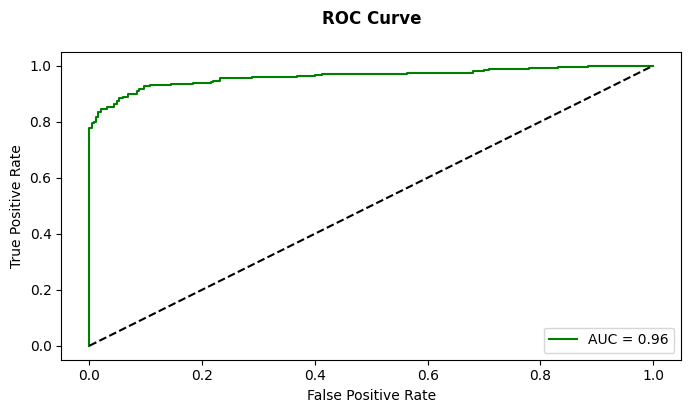

In [120]:
model_prediction(AdaBoostClassifier(**Adaboost_Best_hyperparameters))

## Ensemble Using Voting Classifier

### Considering XGBoost optimised and Adaboost optimised

In [121]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train,y_train)
GB_Model = GradientBoostingClassifier()
GB_Model.fit(x_train,y_train)

GradientBoostingClassifier()

In [122]:
# Train an Ensemble model using a combination of the GBoost and adaboost Classifiers
ensemble_model = VotingClassifier(
    estimators=[
        ('adb', adaboost_model),
        ('gb', GB_Model),
        #('ANN',model)
    ],
    voting='soft'
)

# Use accuracy as the scoring parameter
accuracy_scores = cross_val_score(ensemble_model, x_train, y_train, cv=5, scoring='accuracy')

print("Accuracy scores for each fold:", accuracy_scores)
print("Average accuracy:", accuracy_scores.mean())


Accuracy scores for each fold: [0.92151899 0.91139241 0.92893401 0.92893401 0.91878173]
Average accuracy: 0.9219122277195912



------------------------------------------------------------------------
Accuracy_Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model on Training Data is: 96.80527383367141
Accuracy_Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model on Testing Data is: 93.11740890688259
Precision Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is: 0.9565217391304348
Recall Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is: 0.9016393442622951
AUC Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier

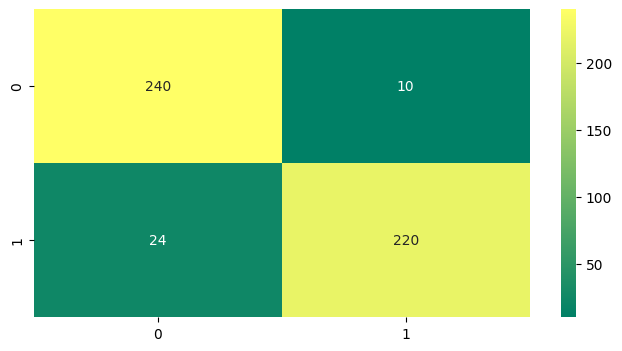


------------------------------------------------------------------------
ROC - AUC Curve of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is:


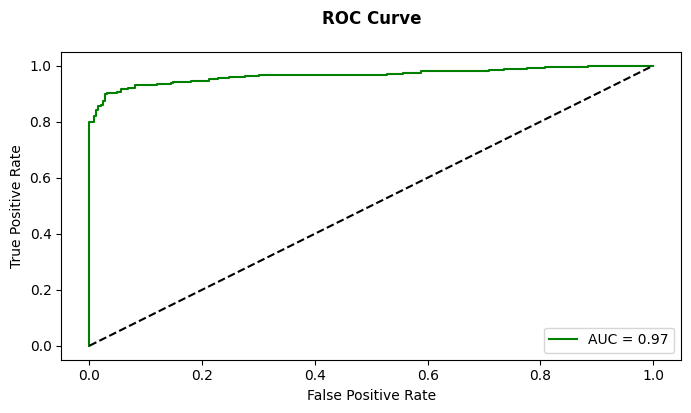

In [123]:
model_prediction(ensemble_model)

In [124]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","CatBoost","LGBM classifier","CatBoost_optimised","XGboost_optimised",'Adaboost_optimised',"Ensemble_Model"]

df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Precision": precission,
                   "Recall": recall,
                   "ROC_AUC Score": Roc_Auc_score,
                   "f1_Score": f1_score_,
                   "Kappa_Score": kappa_score,
                   "G_Mean": G_Mean})
df

Algorithms  Training Score  Testing Score  Precision    Recall  \
0   Logistic Regression       86.206897      84.615385   0.841463  0.848361   
1                   KNN       91.328600      88.259109   0.825175  0.967213   
2           Naive Bayes       76.926978      75.910931   0.710438  0.864754   
3         Decision Tree      100.000000      87.044534   0.843511  0.905738   
4         Random Forest      100.000000      92.914980   0.968610  0.885246   
5             Ada Boost       92.647059      90.485830   0.912134  0.893443   
6        Gradient Boost       96.906694      93.117409   0.956522  0.901639   
7               XGBoost      100.000000      92.307692   0.959821  0.881148   
8              CatBoost       99.594320      93.319838   0.960699  0.901639   
9       LGBM classifier      100.000000      92.307692   0.951754  0.889344   
10   CatBoost_optimised       99.898580      92.510121   0.955947  0.889344   
11    XGboost_optimised       98.985801      92.914980   0.952381  0.901639   
12   Adaboost_optimised       94.320487      91.497976   0.939130  0.885246   
13       Ensemble_Model       96.805274      93.117409   0.956522  0.901639   

    ROC_AUC Score  f1_Score  Kappa_Score    G_Mean  
0        0.921705  0.844898     0.692293  0.846180  
1        0.963459  0.890566     0.765632  0.883607  
2        0.856049  0.780037     0.519400  0.760377  
3        0.870869  0.873518     0.741082  0.870869  
4        0.978164  0.925054     0.858132  0.928623  
5        0.955459  0.902692     0.809642  0.904721  
6        0.965754  0.928270     0.862233  0.930820  
7        0.974098  0.918803     0.845980  0.922574  
8        0.971672  0.930233     0.866278  0.932820  
9        0.975082  0.919492     0.846010  0.922672  
10       0.972918  0.921444     0.850055  0.924672  
11       0.968410  0.926316     0.858188  0.928820  
12       0.961443  0.911392     0.829817  0.914623  
13       0.965820  0.928270     0.862233  0.930820

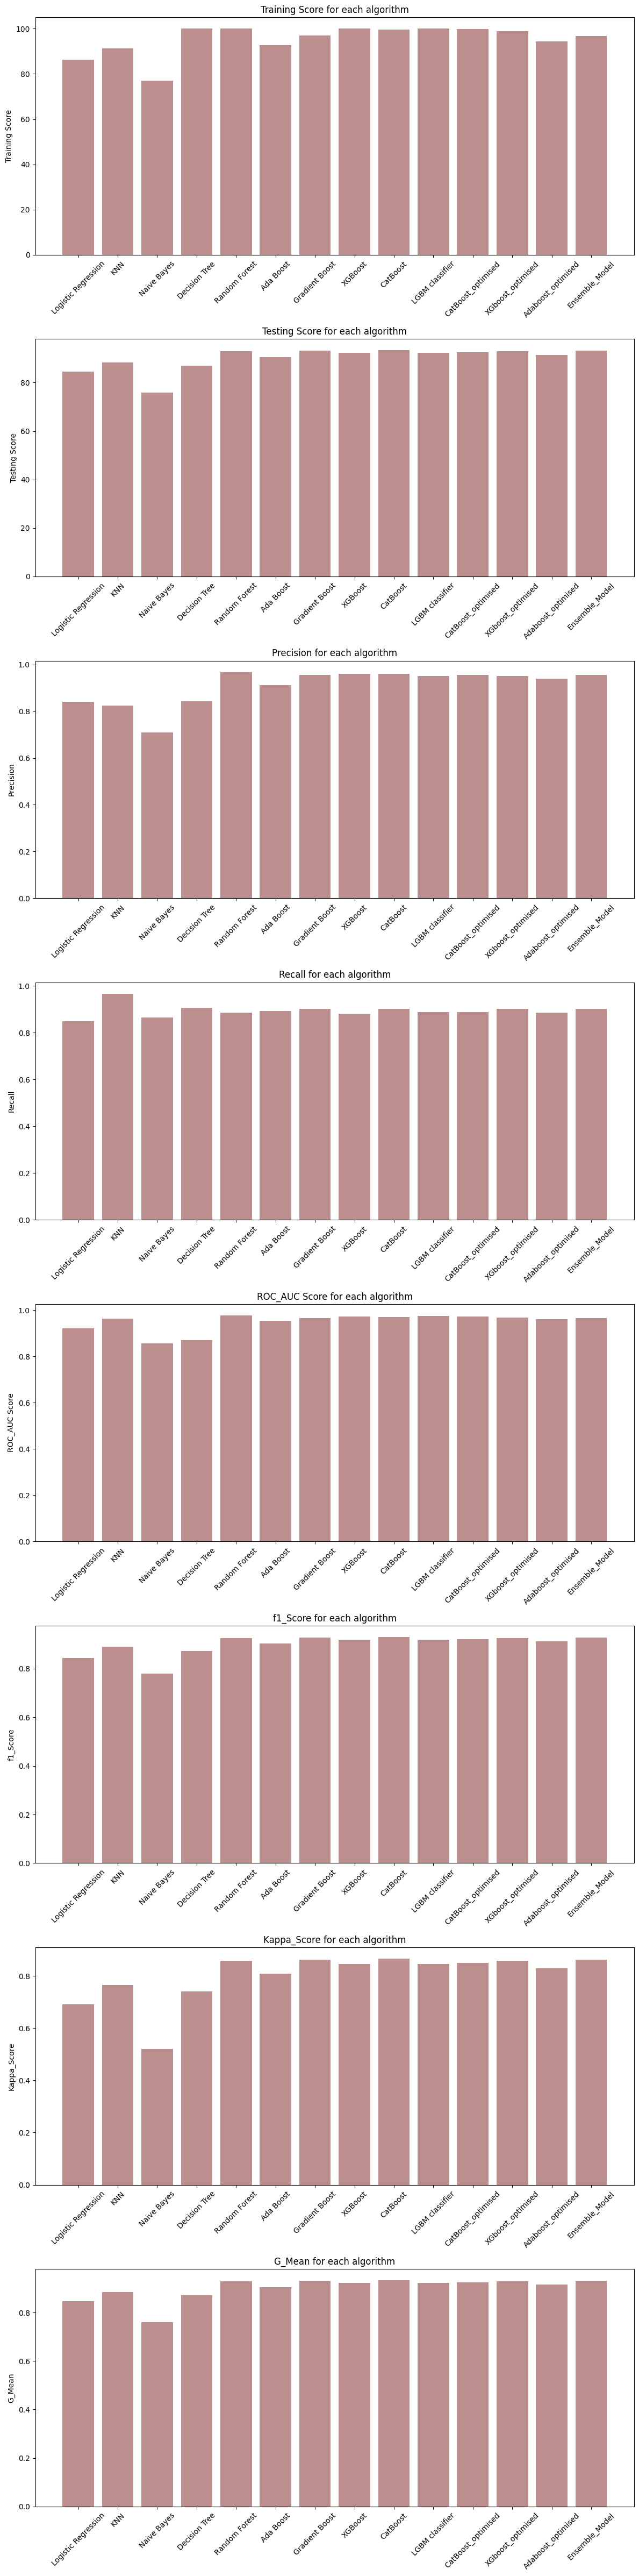

In [126]:
# Define metrics to plot
metrics_to_plot = ["Training Score", "Testing Score", "Precision", "Recall", "ROC_AUC Score", "f1_Score", "Kappa_Score", "G_Mean"]

# Create subplots
fig, axes = plt.subplots(nrows=len(metrics_to_plot), ncols=1, figsize=(12, 6*len(metrics_to_plot)))

# Plot each metric for every algorithm
for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(df["Algorithms"], df[metric],color='rosybrown')
    axes[i].set_ylabel(metric)
    axes[i].set_title(f"{metric} for each algorithm")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(ensemble_model, 'ensemble_model.pkl')

In [132]:
x_train

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
463    26        471                24          3                        3   
1037   45       1448                29          3                        2   
1114   48       1108                15          4                        3   
1503   27        607                12          2                        1   
1818   33        335                12          3                        4   
...   ...        ...               ...        ...                      ...   
1638   31        287                13          4                        2   
1095   33        589                28          4                        2   
1130   35        750                28          3                        2   
1294   41        447                 5          3                        2   
860    22       1256                 3          4                        3   

      Gender  HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  \
463        1          66               1                4           2340   
1037       1          55               3                4           9380   
1114       0          65               3                1           2367   
1503       0          68               1                3           4566   
1818       1          83               2                2           3204   
...      ...         ...             ...              ...            ...   
1638       1          86               1                3           6175   
1095       1          79               3                3           5207   
1130       1          46               4                3           3407   
1294       1          85               4                2           6870   
860        1          48               2                4           2853   

      MonthlyRate  NumCompaniesWorked  PerformanceRating  \
463         23213                   1                  3   
1037        14720                   4                  3   
1114        16530                   8                  3   
1503        24786                   5                  3   
1818        21656                   0                  3   
...           ...                 ...                ...   
1638        20891                   2                  3   
1095        22949                   1                  3   
1130        25348                   1                  3   
1294        15530                   3                  3   
860          4223                   0                  3   

      RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
463                          2                 0                      3   
1037                         4                 2                      4   
1114                         4                 1                      3   
1503                         2                 0                      2   
1818                         1                 0                      1   
...                        ...               ...                    ...   
1638                         2                 0                      3   
1095                         2                 1                      3   
1130                         4                 2                      3   
1294                         1                 0                      3   
860                          2                 1                      5   

      WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  \
463                 1               1                        0   
1037                4               3                        1   
1114                2               8                        7   
1503                3               2                        2   
1818                2               1                        0   
...               ...             ...                      ...   
1638                2               8                        6   
1095  

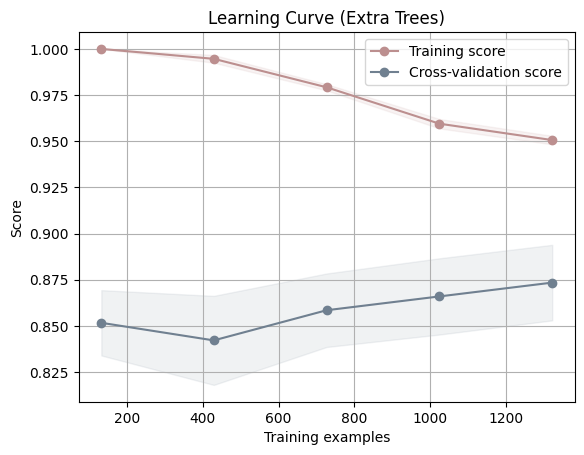

In [138]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ensemble_model,x, y, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Extra Trees)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="rosybrown")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="slategray")
plt.plot(train_sizes, train_scores_mean, 'o-', color="rosybrown", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="slategray", label="Cross-validation score")
plt.legend(loc="best")

plt.show()